In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_methodology.pdf
/kaggle/input/kaggle-survey-2021/supplementary_data/kaggle_survey_2021_answer_choices.pdf


# Imports

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [3]:
# import data
df = pd.read_csv("/kaggle/input/kaggle-survey-2021/kaggle_survey_2021_responses.csv")
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# We remove the first row of the data set because it

data = df.iloc[1:,:]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25973 entries, 1 to 25973
Columns: 369 entries, Time from Start to Finish (seconds) to Q38_B_OTHER
dtypes: object(369)
memory usage: 73.1+ MB


In [6]:
data.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
count,25973,25973,25973,25973,25973,25973,25973,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,4542,377
unique,5409,11,5,66,7,15,7,1,1,1,...,1,1,1,1,1,1,1,1,1,1
top,484,25-29,Man,India,Master’s degree,Student,1-3 years,Python,R,SQL,...,Comet.ml,Sacred + Omniboard,TensorBoard,Guild.ai,Polyaxon,ClearML,Domino Model Monitor,MLflow,None,Other
freq,42,4931,20598,7434,10132,6804,7874,21860,5334,10756,...,633,591,4239,729,737,1020,666,2747,4542,377


# EDA

* we have 25973 row with 369 feature all classified as object features
* There are question that have multiple choice 
* each choise have its column 

## What is the age of the participants - Age Group

let's see what are the age groups who participated in the survey

In [7]:
labels = list(data.Q1.value_counts().index)
values = list(data.Q1.value_counts())
labels, values

(['25-29',
  '18-21',
  '22-24',
  '30-34',
  '35-39',
  '40-44',
  '45-49',
  '50-54',
  '55-59',
  '60-69',
  '70+'],
 [4931, 4901, 4694, 3441, 2504, 1890, 1375, 964, 592, 553, 128])

In [8]:
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

We can obviously see that majority of Kagglers (37,9%) are between 21 to 29 years of age as 18,9% are between 28-21 & 19% are between 25-29.

Very few Kagglers are over the age of 50 (8,61%)

## Participants Gender

In [9]:
labels = list(data.Q2.value_counts().index)
values = list(data.Q2.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0.1, 0.2, 0.2, 0.2], hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

<AxesSubplot:xlabel='Q2', ylabel='count'>

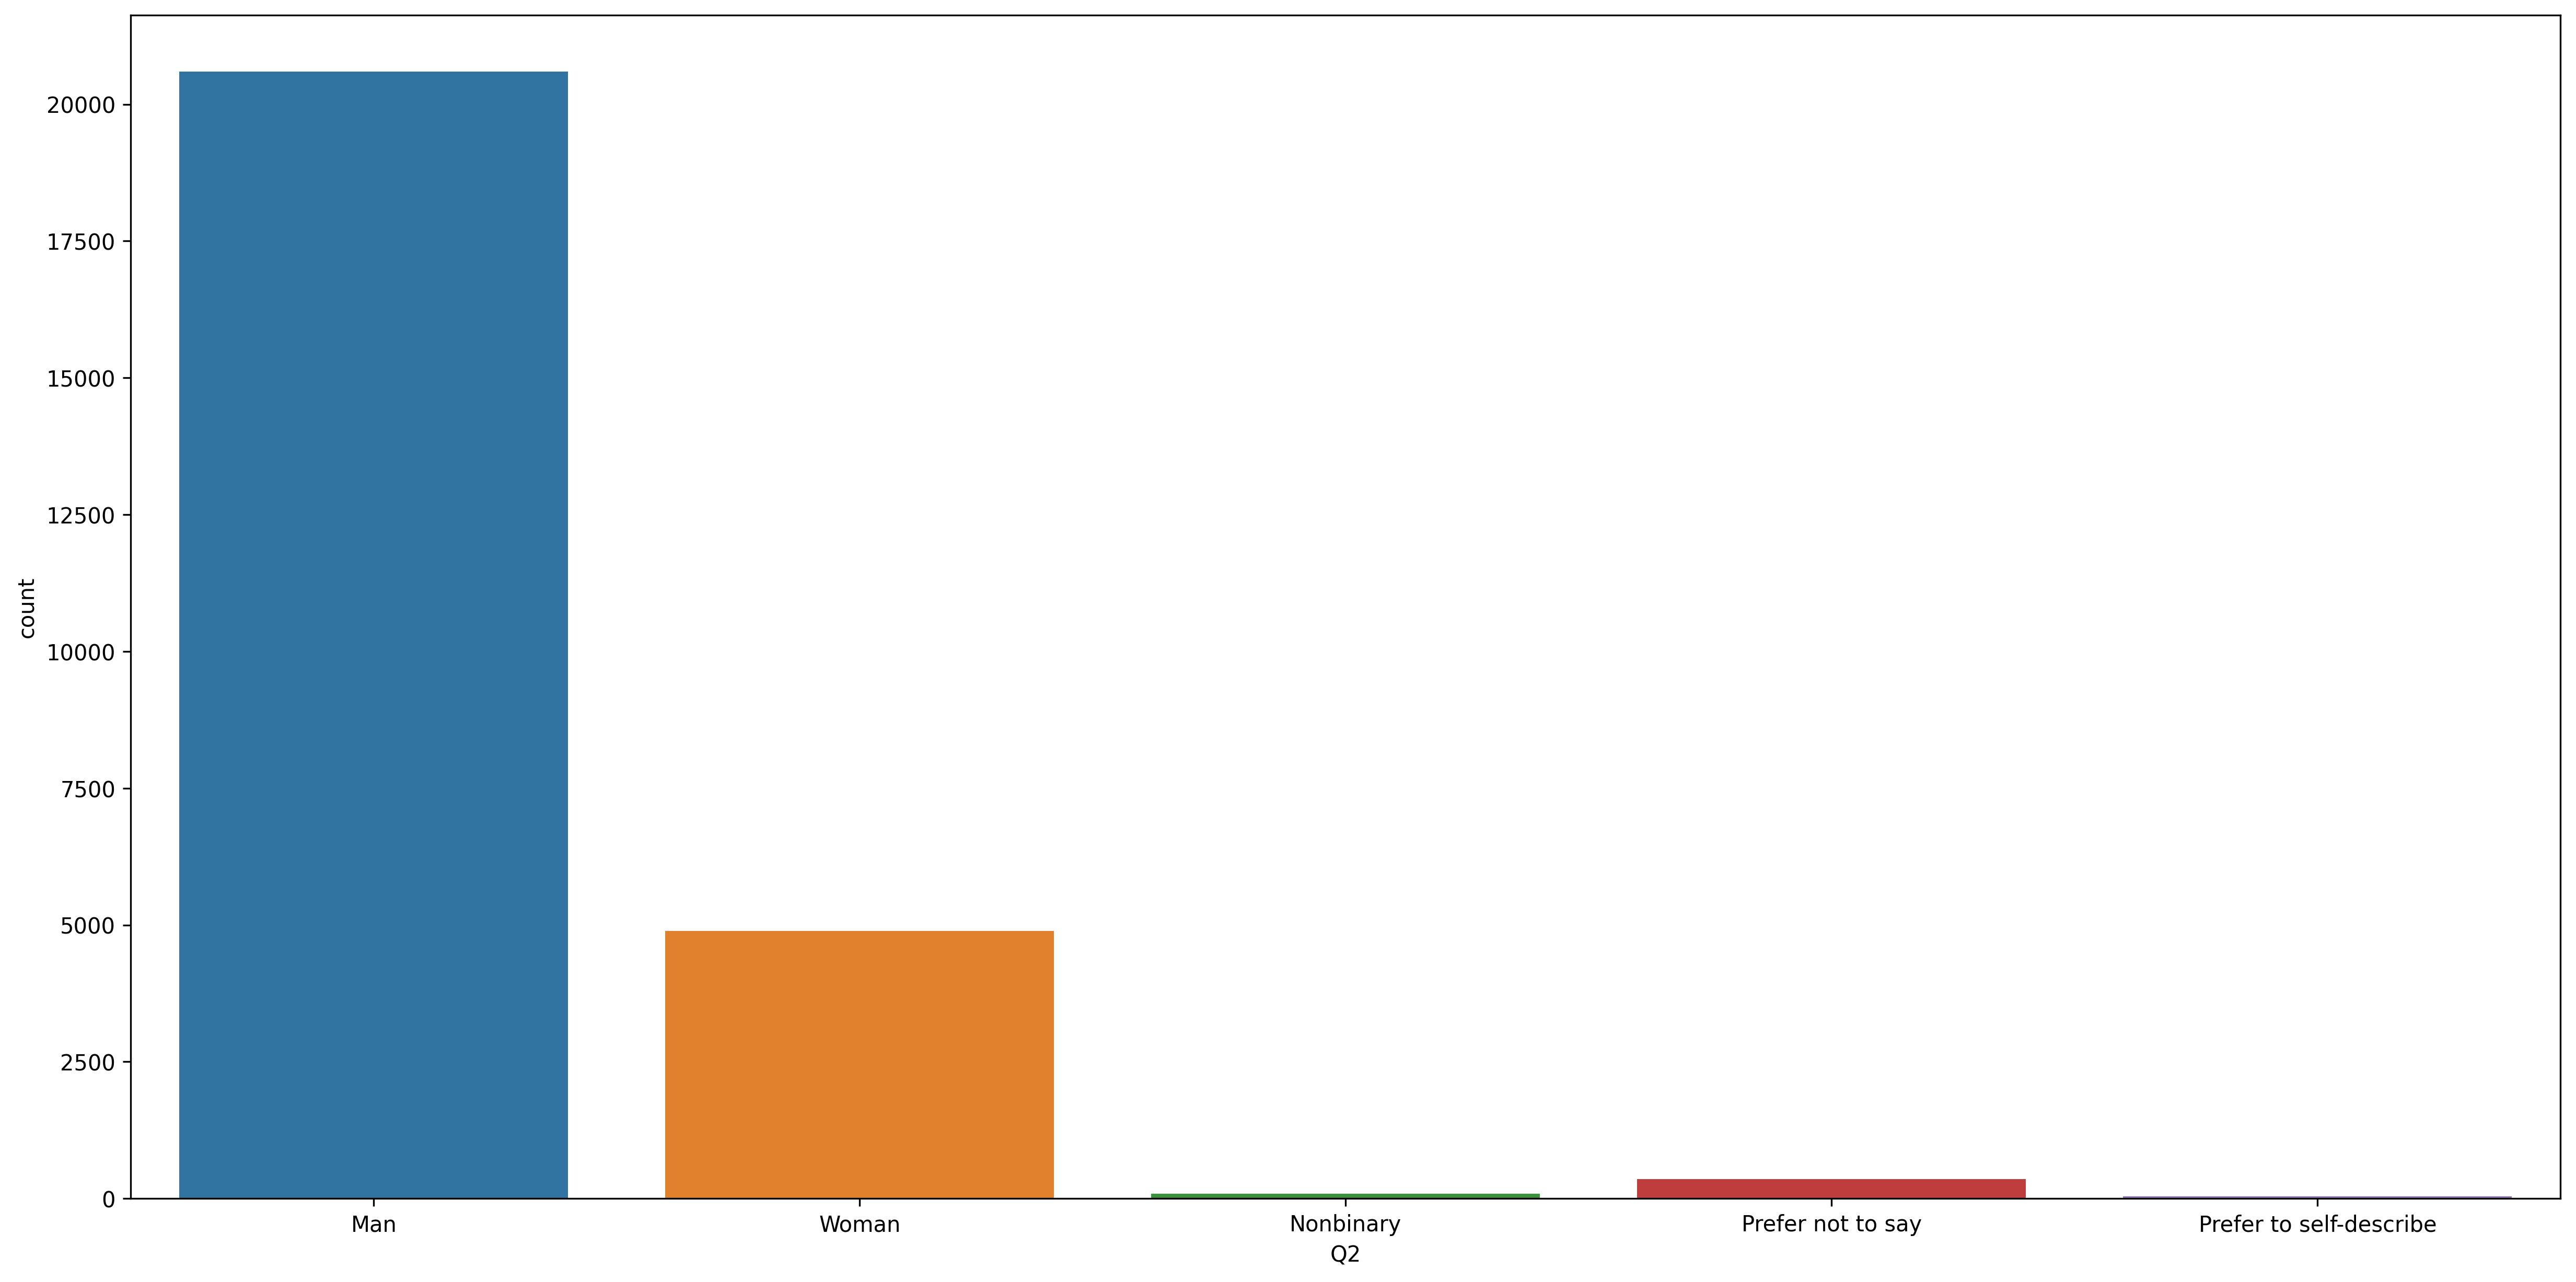

In [10]:
plt.figure(figsize= (20, 10), dpi= 300)
sns.countplot(x= 'Q2', data= data)

Hmmm, 2021's survey is dominanted by men, they are almost 80% of the participants .

There are also 18% Women Kagglers. The ratio is not that bad, but it can be improved upon.

Finally, about 2% are either Non-Bianary, Do not wish to disclose or Prefer to self explain.

<AxesSubplot:xlabel='Q1', ylabel='count'>

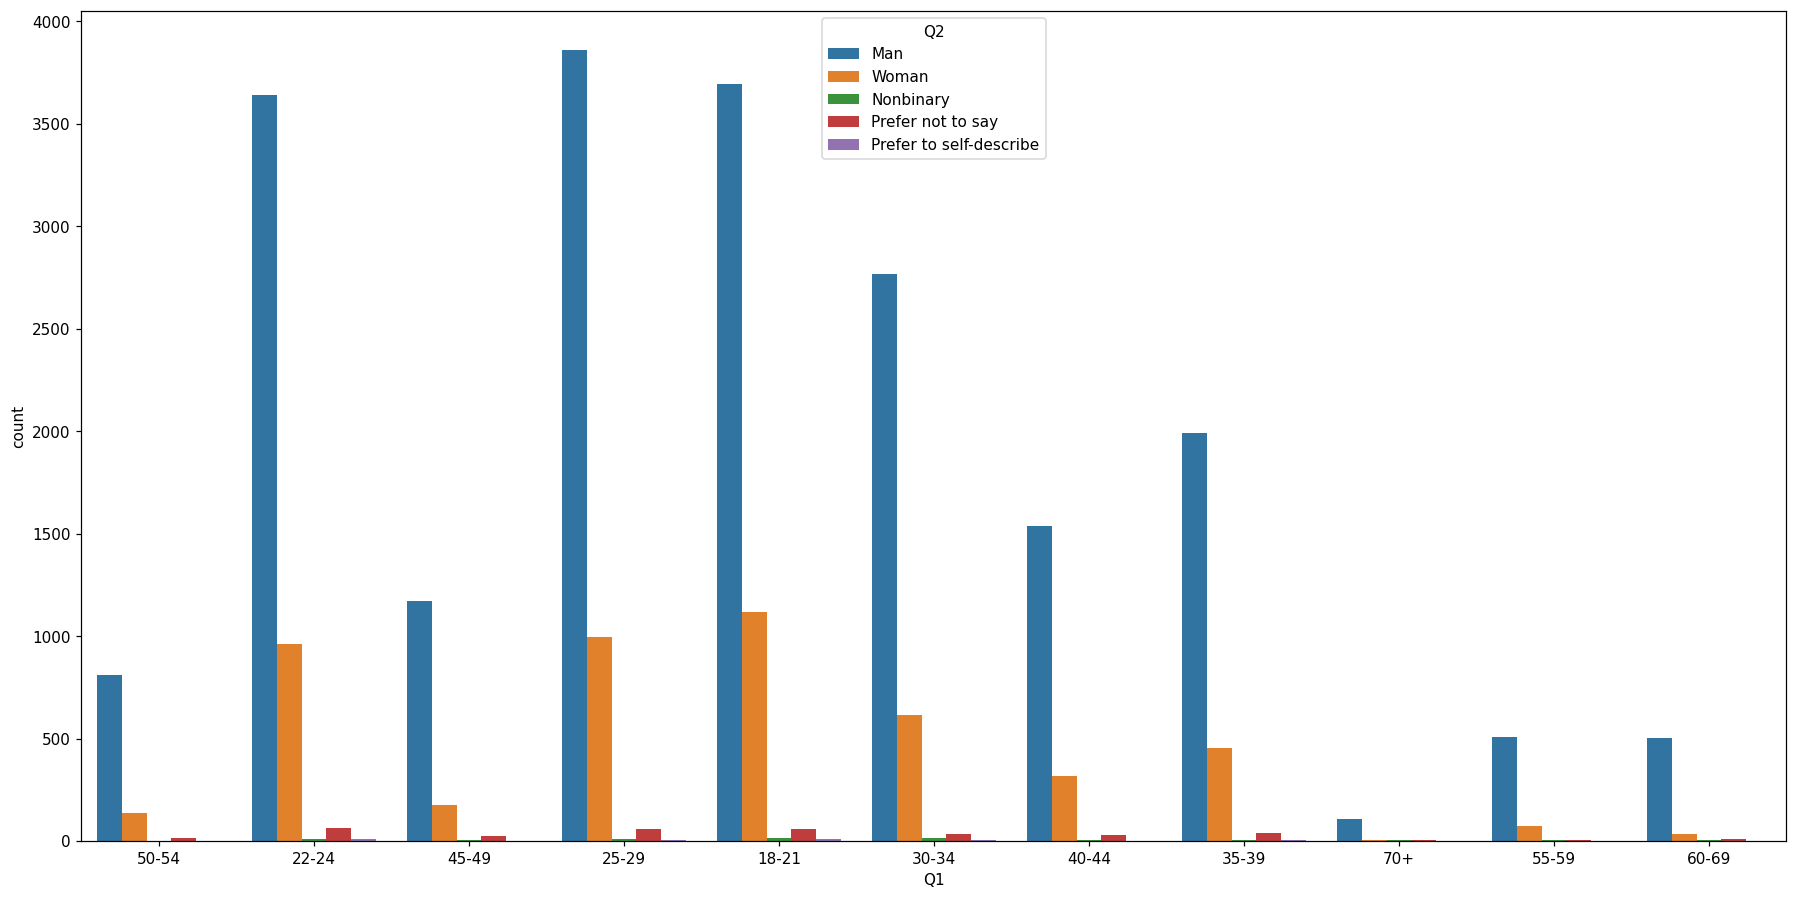

In [11]:
### Let's see the age group based on sex of the participants
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(x= 'Q1', data= data, hue= 'Q2')

* Even with the age groups, Men are always dominants then Women. 
* if we look more deeper, woman that are 18-21 years old age range, is much higher than other age range. 
* age groupe between 30 to 50 years old are declining clearly in population. 
* It seems that these people are the one who were early practitioners of the modern Machine Learning and Data Science.

## Where are the participants from?

<AxesSubplot:xlabel='count', ylabel='Q3'>

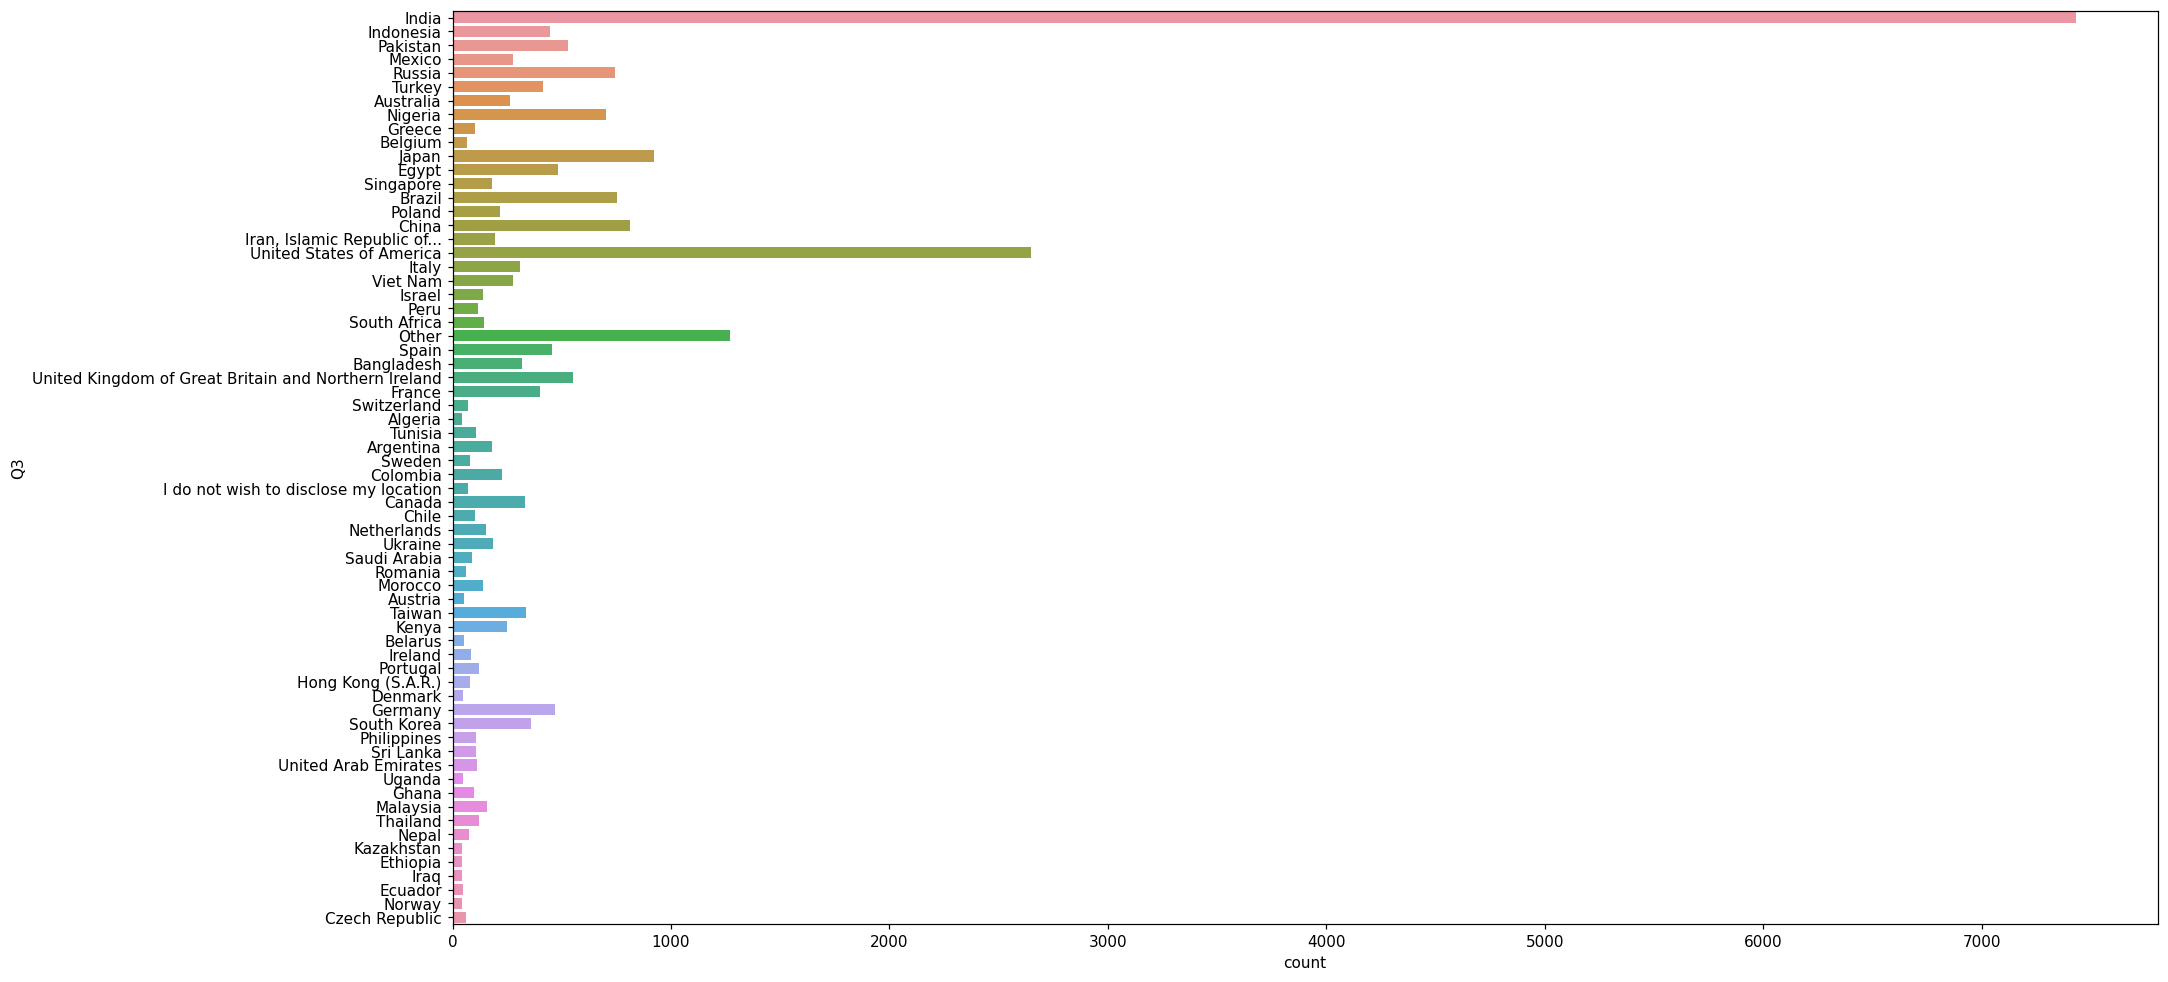

In [12]:
plt.figure(figsize= (20, 11), dpi= 110)
sns.countplot(y ='Q3', data = data)

most of the participants live in India, USA, Japan, Russia, Brazil, Uk,China.

Very less number of the participants are from from Norway, Algeria, Ehiopia and Denmark.

**Morocco** is the first country amoung North africa participants

## What is the highest level of formal education for the participants

In [13]:
df

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='count', ylabel='Q4'>

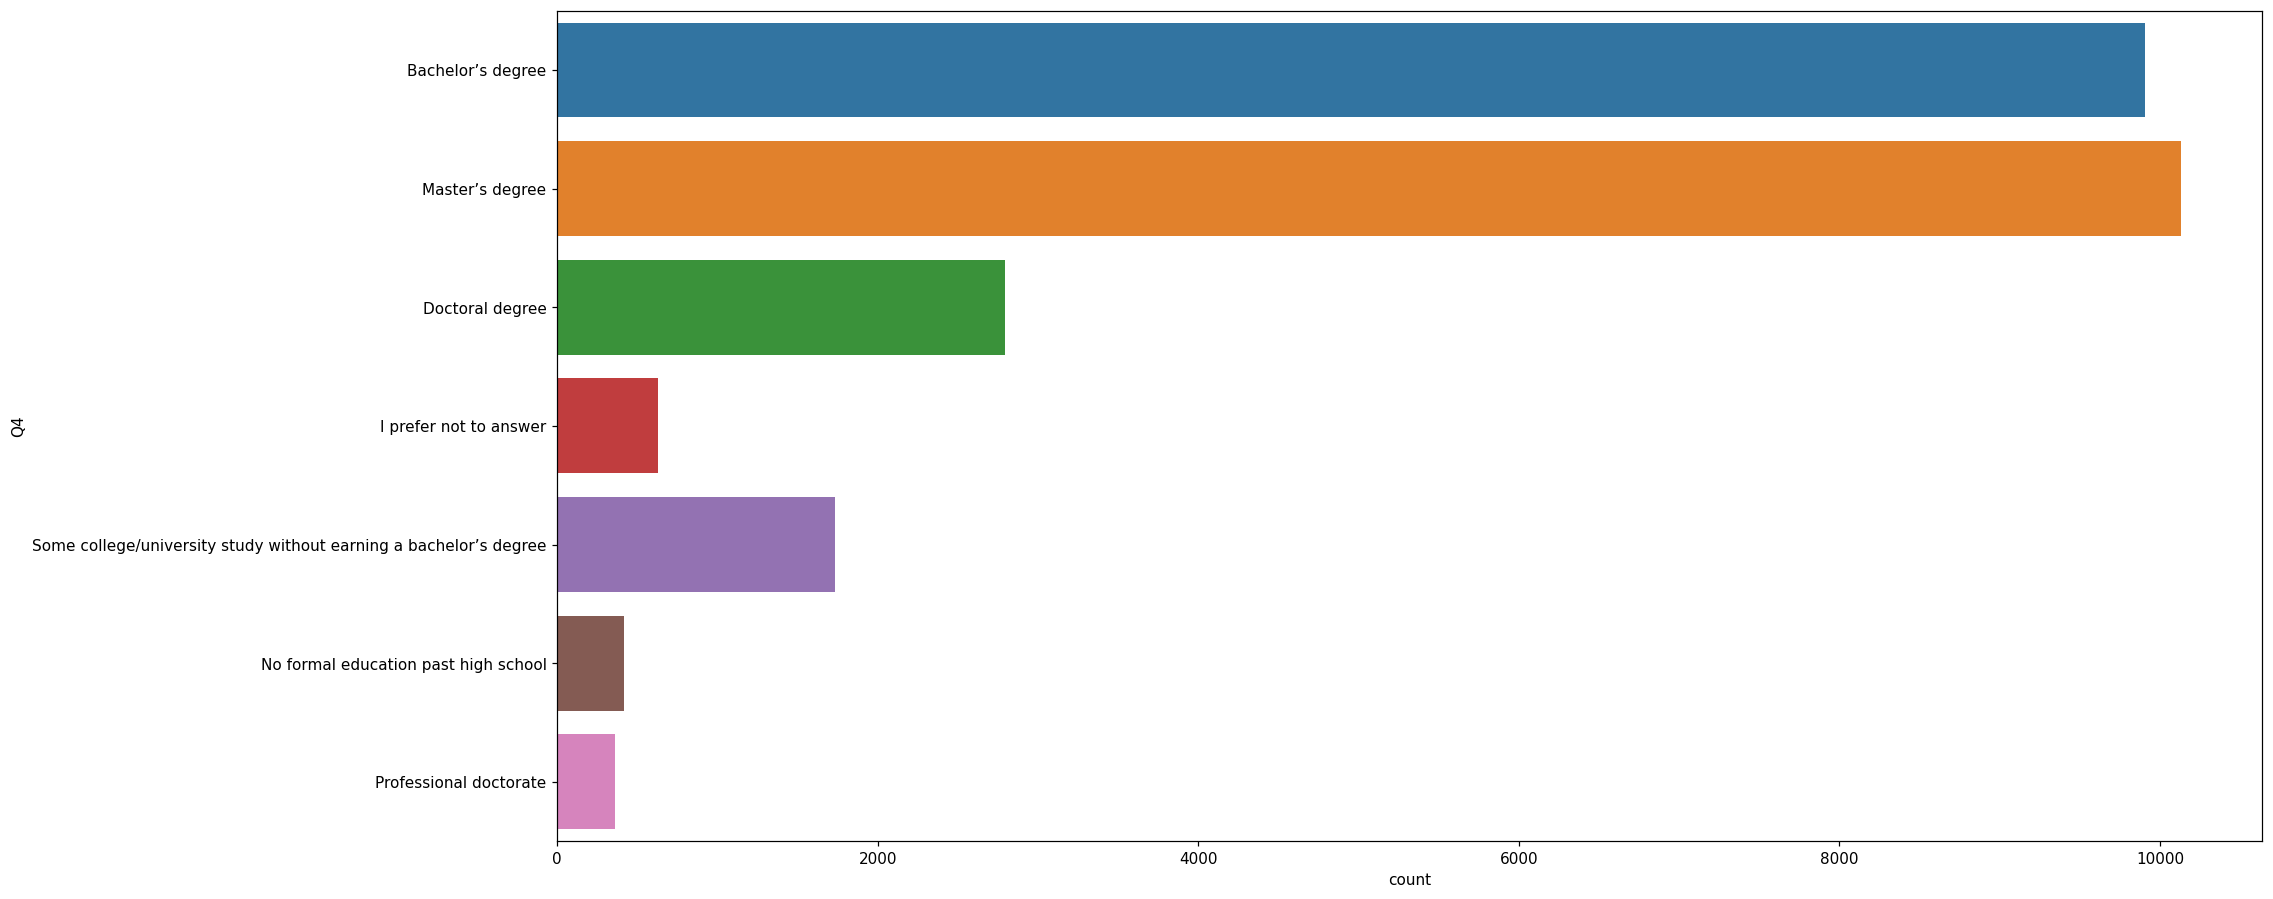

In [14]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q4', data= data)

<AxesSubplot:xlabel='count', ylabel='Q4'>

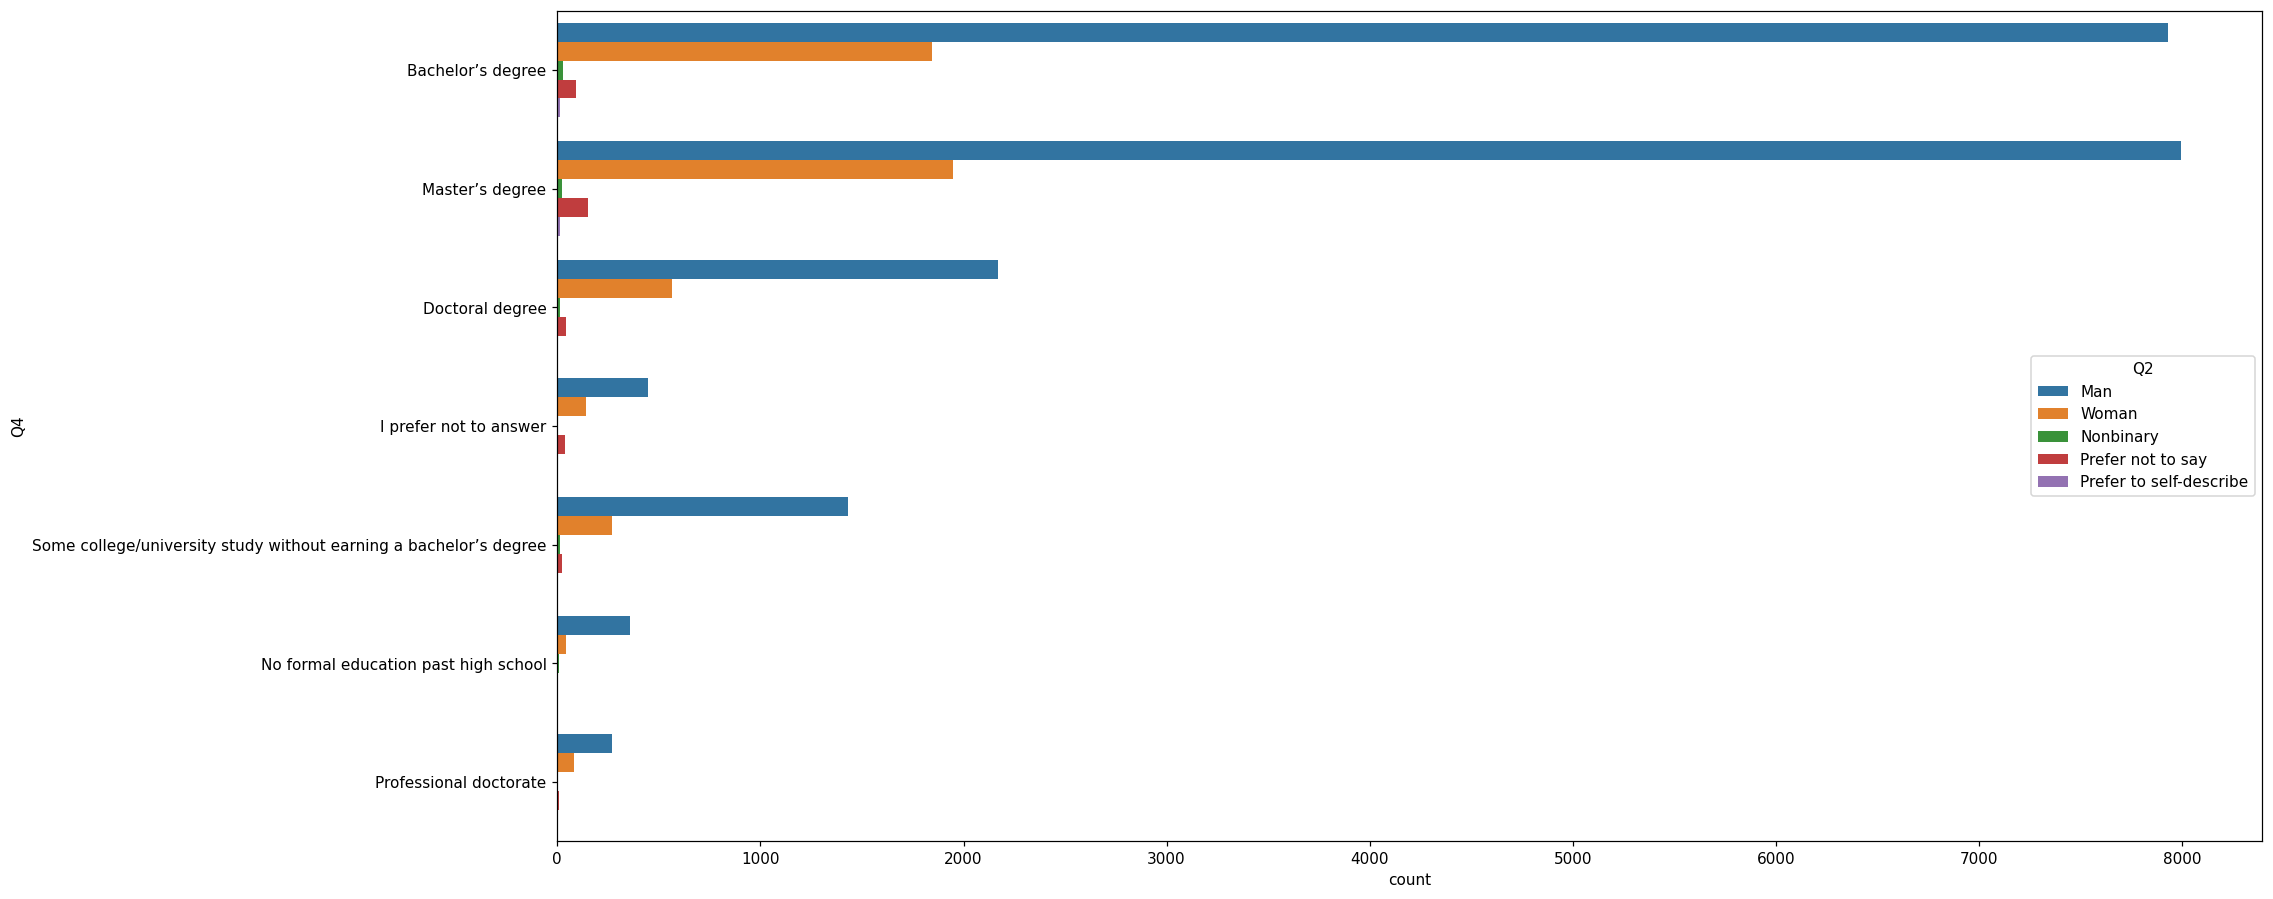

In [15]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q4', data= data, hue="Q2")

Most of the participants either hold a Master's degree or a Bachelor's degree

## Participants Current Job

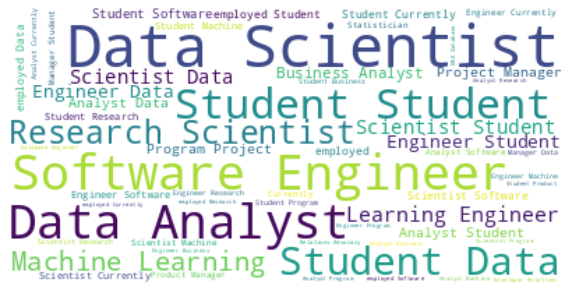

In [16]:
plt.figure(figsize= (10, 10))
# Create a word cloud of the current jobs
from wordcloud import WordCloud
#Creating the text variable
text = " ".join(job for job in data.Q5)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = True, background_color = 'white').generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [17]:
labels = list(data.Q5.value_counts().index)
values = list(data.Q5.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.1, 0.1, 0.1, 0.1, 0.1], hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

<AxesSubplot:xlabel='count', ylabel='Q5'>

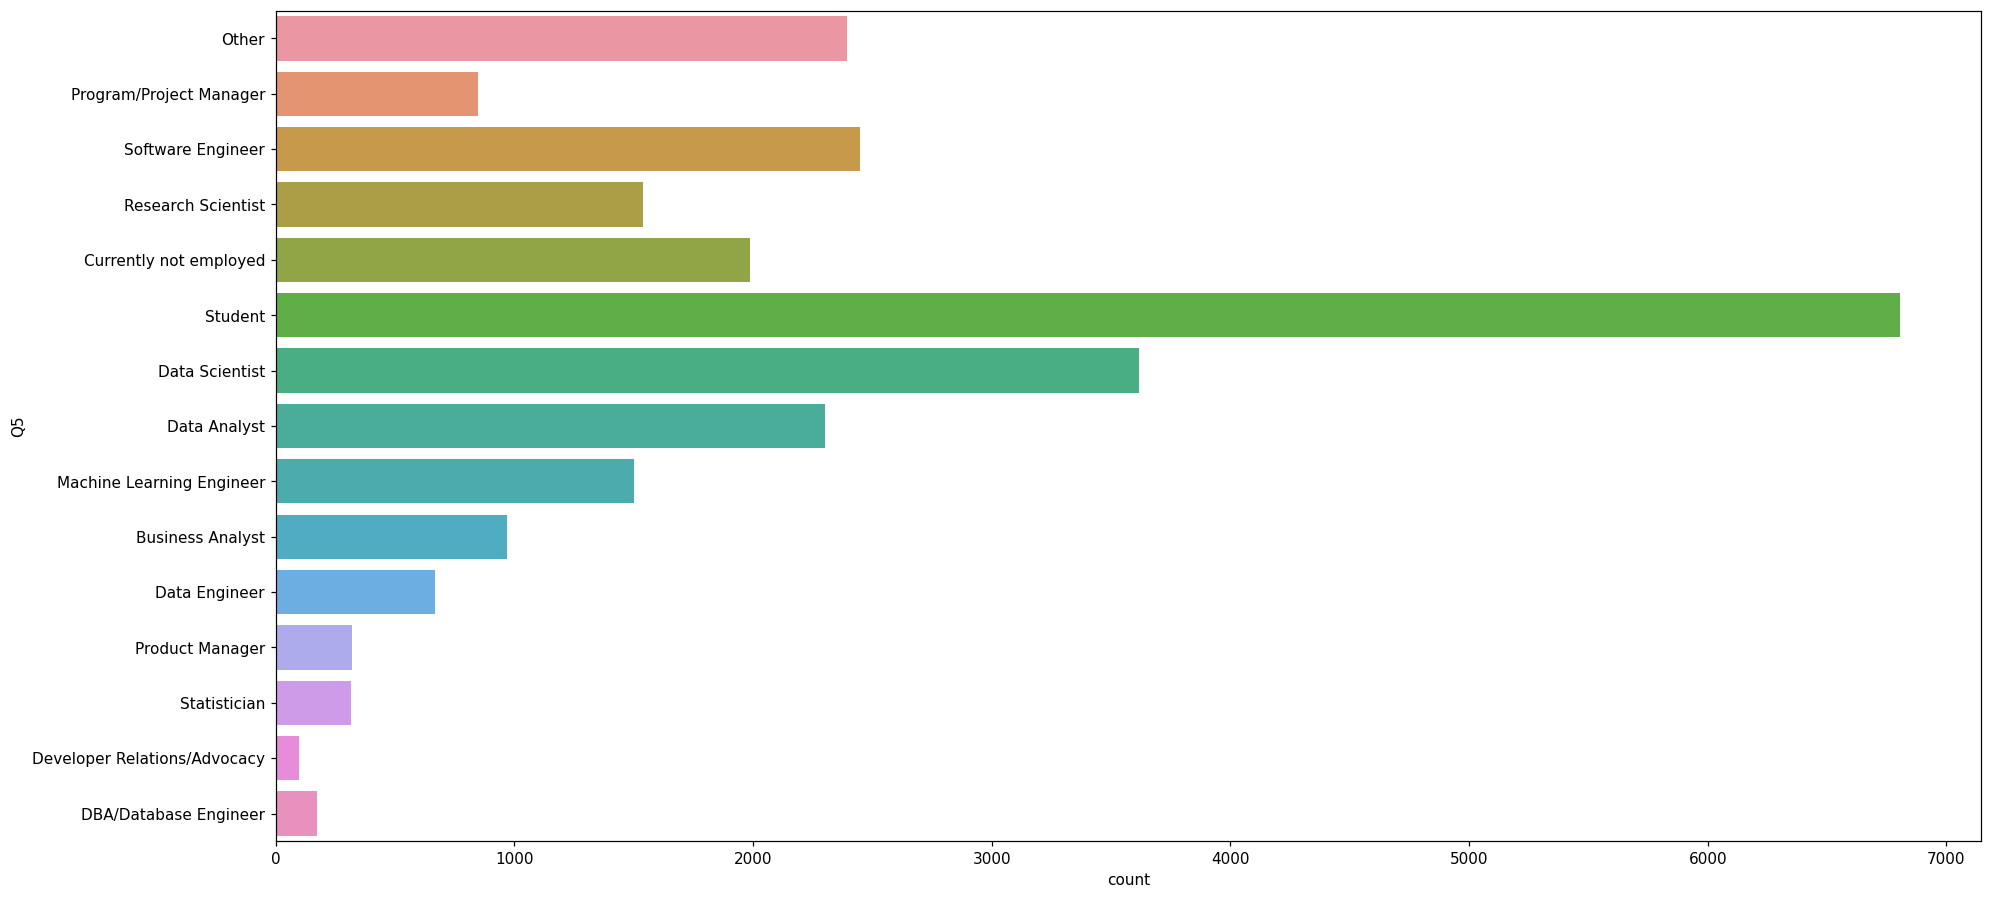

In [18]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q5', data= data)

<AxesSubplot:xlabel='count', ylabel='Q5'>

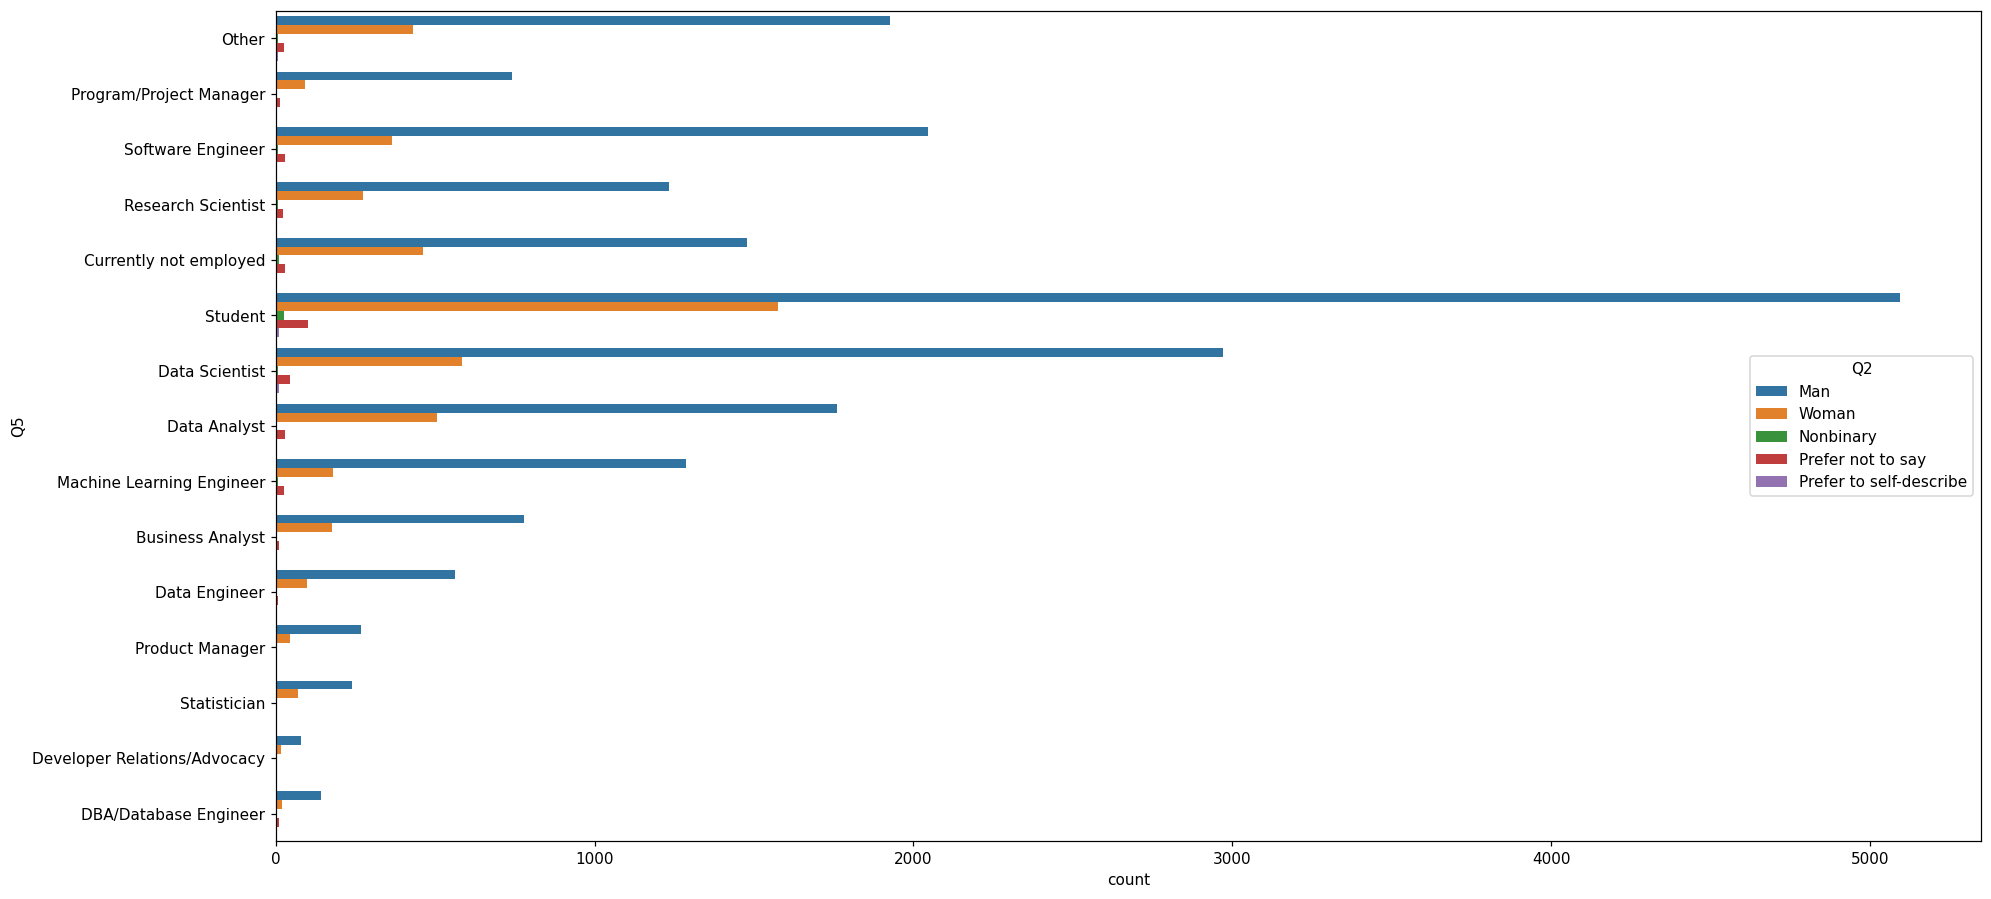

In [19]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q5', data= data, hue="Q2")

<AxesSubplot:xlabel='count', ylabel='Q5'>

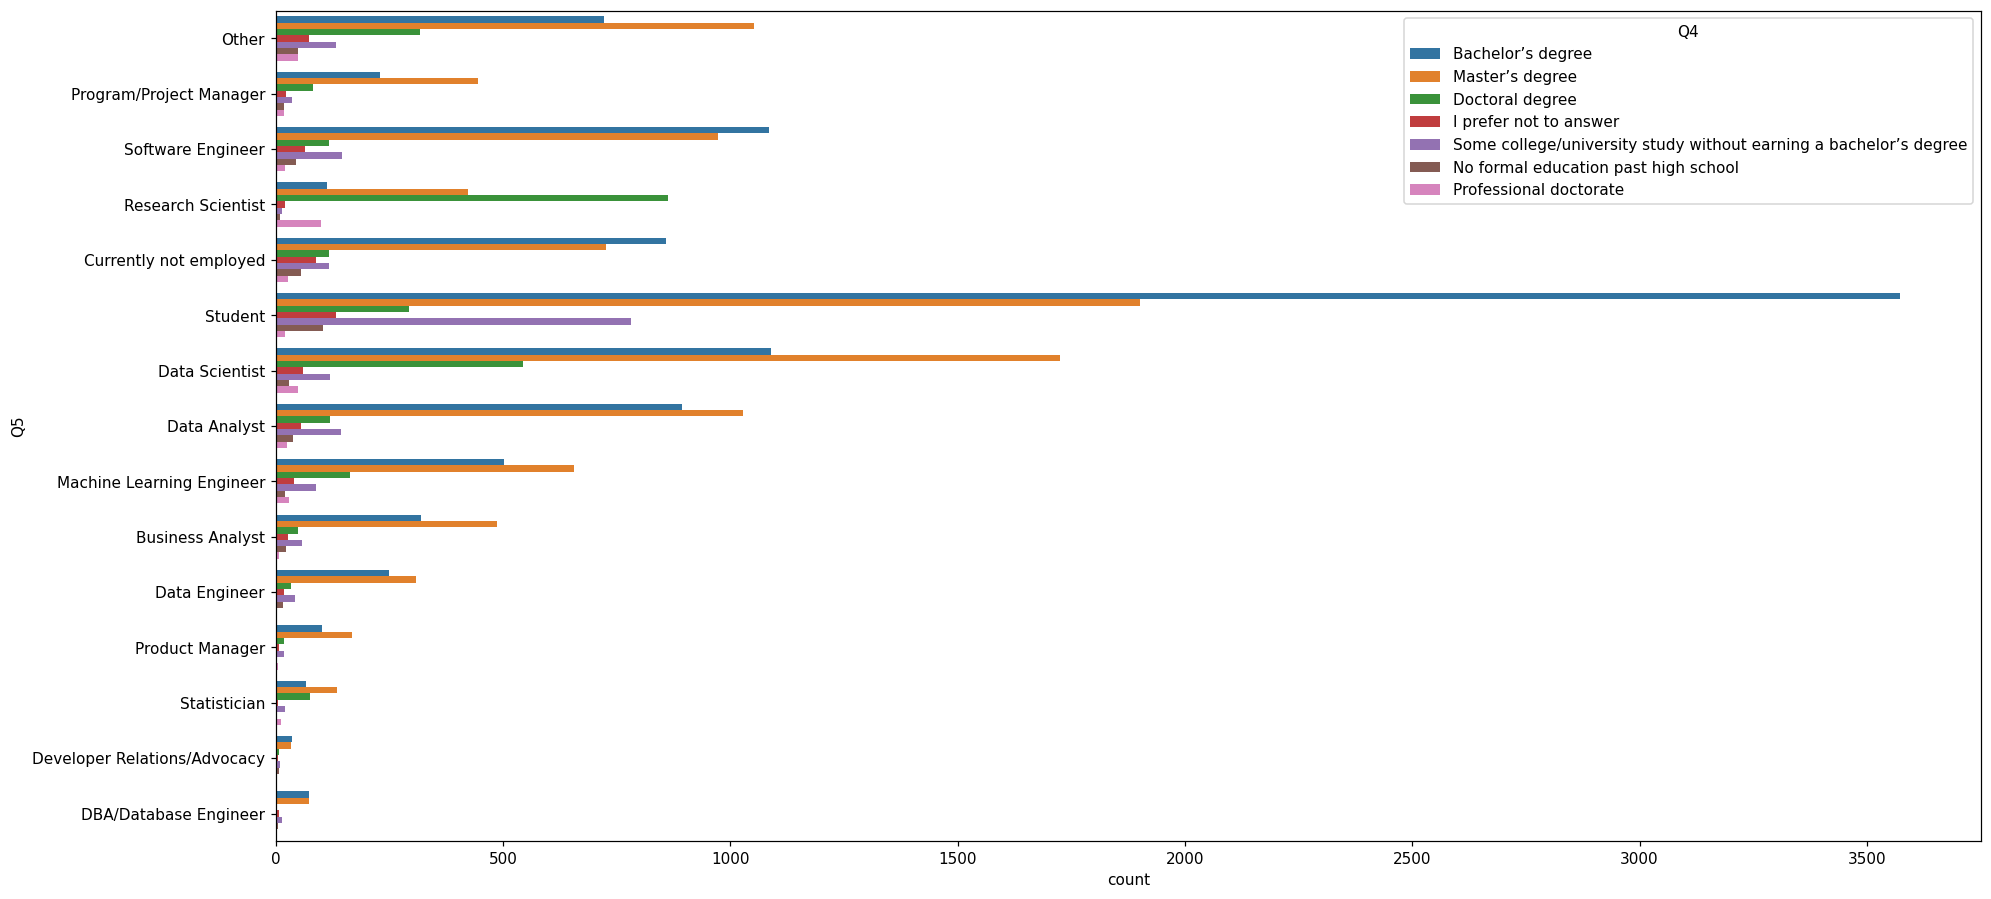

In [20]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q5', data= data, hue="Q4")

Ooops, I was expecting that the most of the participants are Data Scientists/Analysts or ML Enginneers, however, we can see that majority of the participants are Students!

Therefore, Students, followed by Data Scientists, Software Engineers and Data Analysts are pre-dominantly the main professions in Kaggle.

Most of the participants have 3 principal educational paths, whether a Bachelor, Master, or Doctoral degrees

Notice that data jobs ( Data Scientists/Analysts, ML enginners and statisticians ) are tend to have a master degree

## For how many years have the participants been writing code ?

In [21]:
labels = list(data.Q6.value_counts().index)
values = list(data.Q6.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

<AxesSubplot:xlabel='count', ylabel='Q6'>

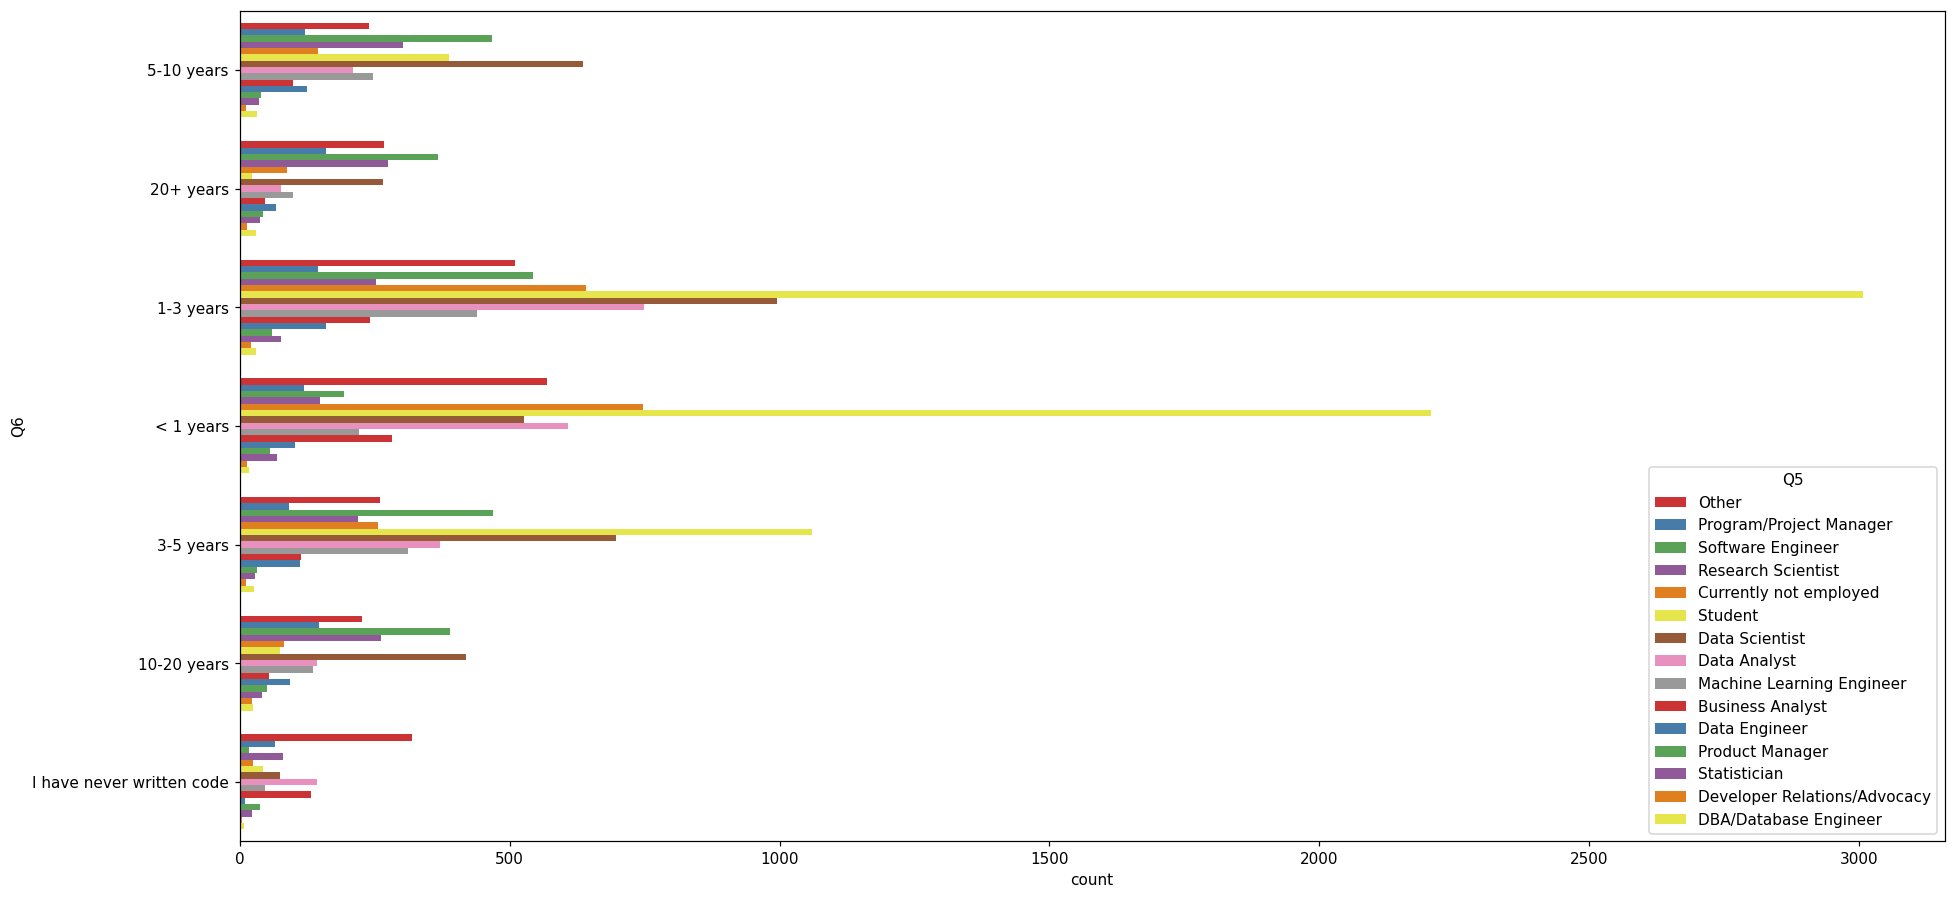

In [22]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q6', data= data, hue="Q5", palette="Set1")

<AxesSubplot:xlabel='count', ylabel='Q6'>

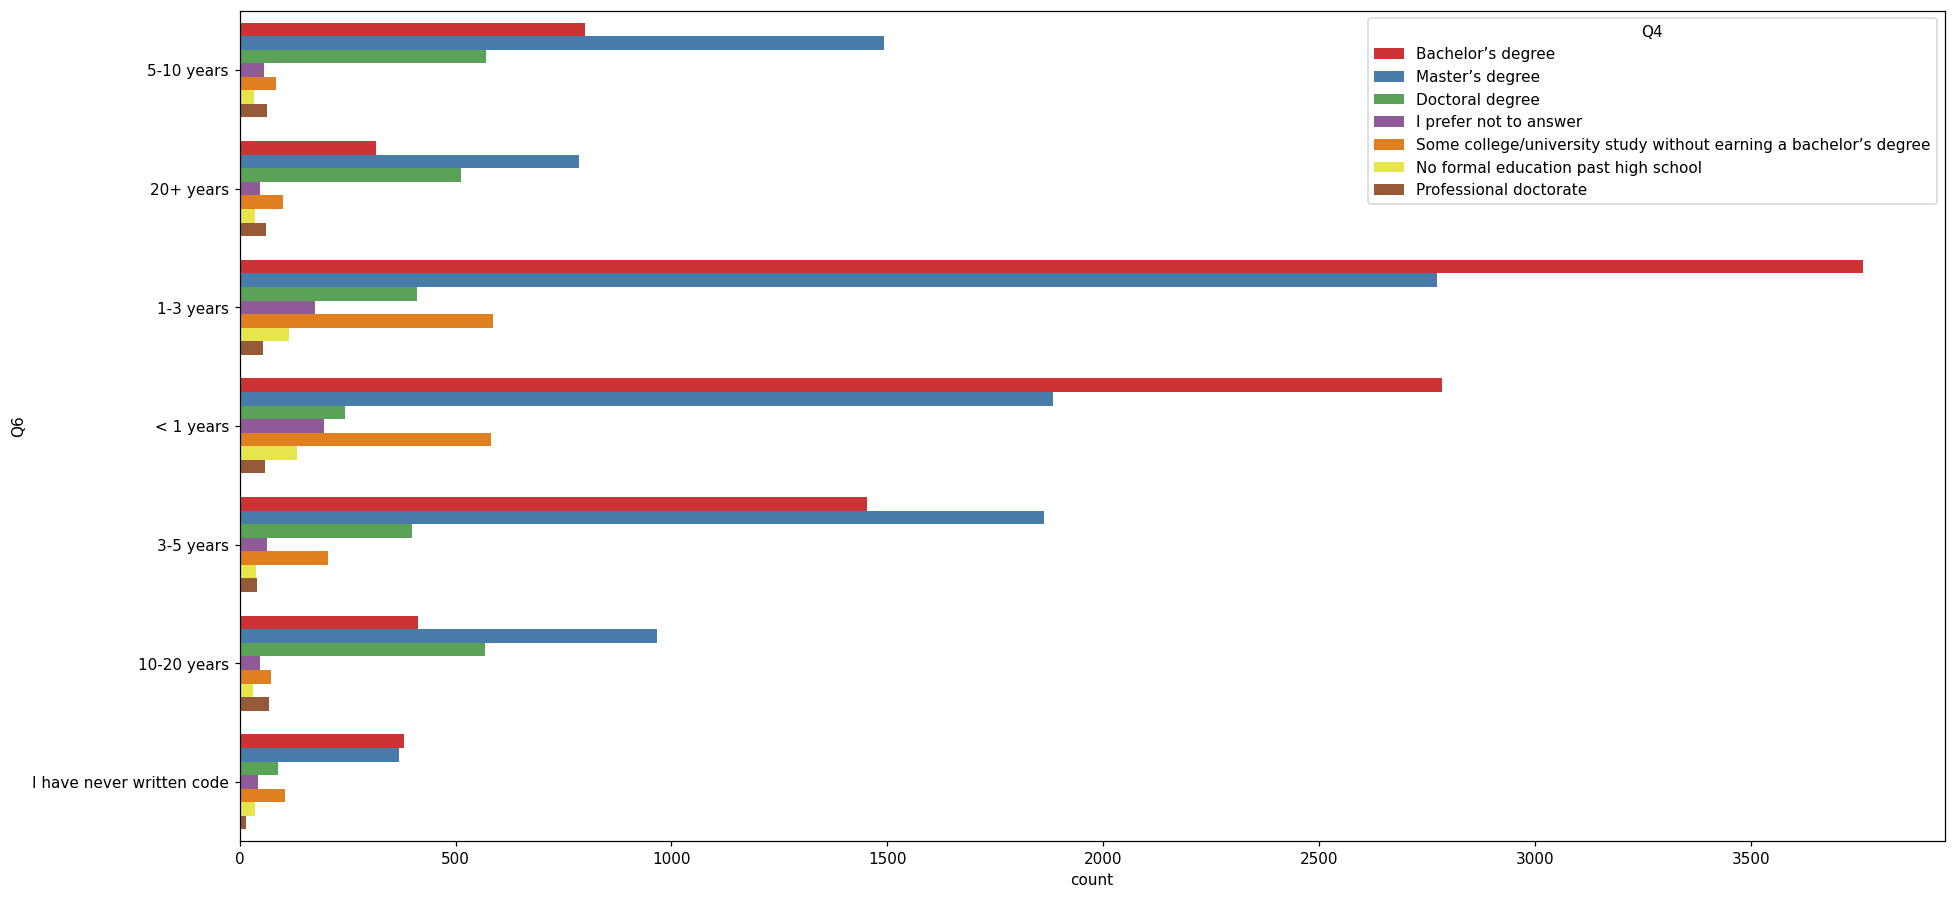

In [23]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q6', data= data, hue="Q4", palette="Set1")

<AxesSubplot:xlabel='count', ylabel='Q6'>

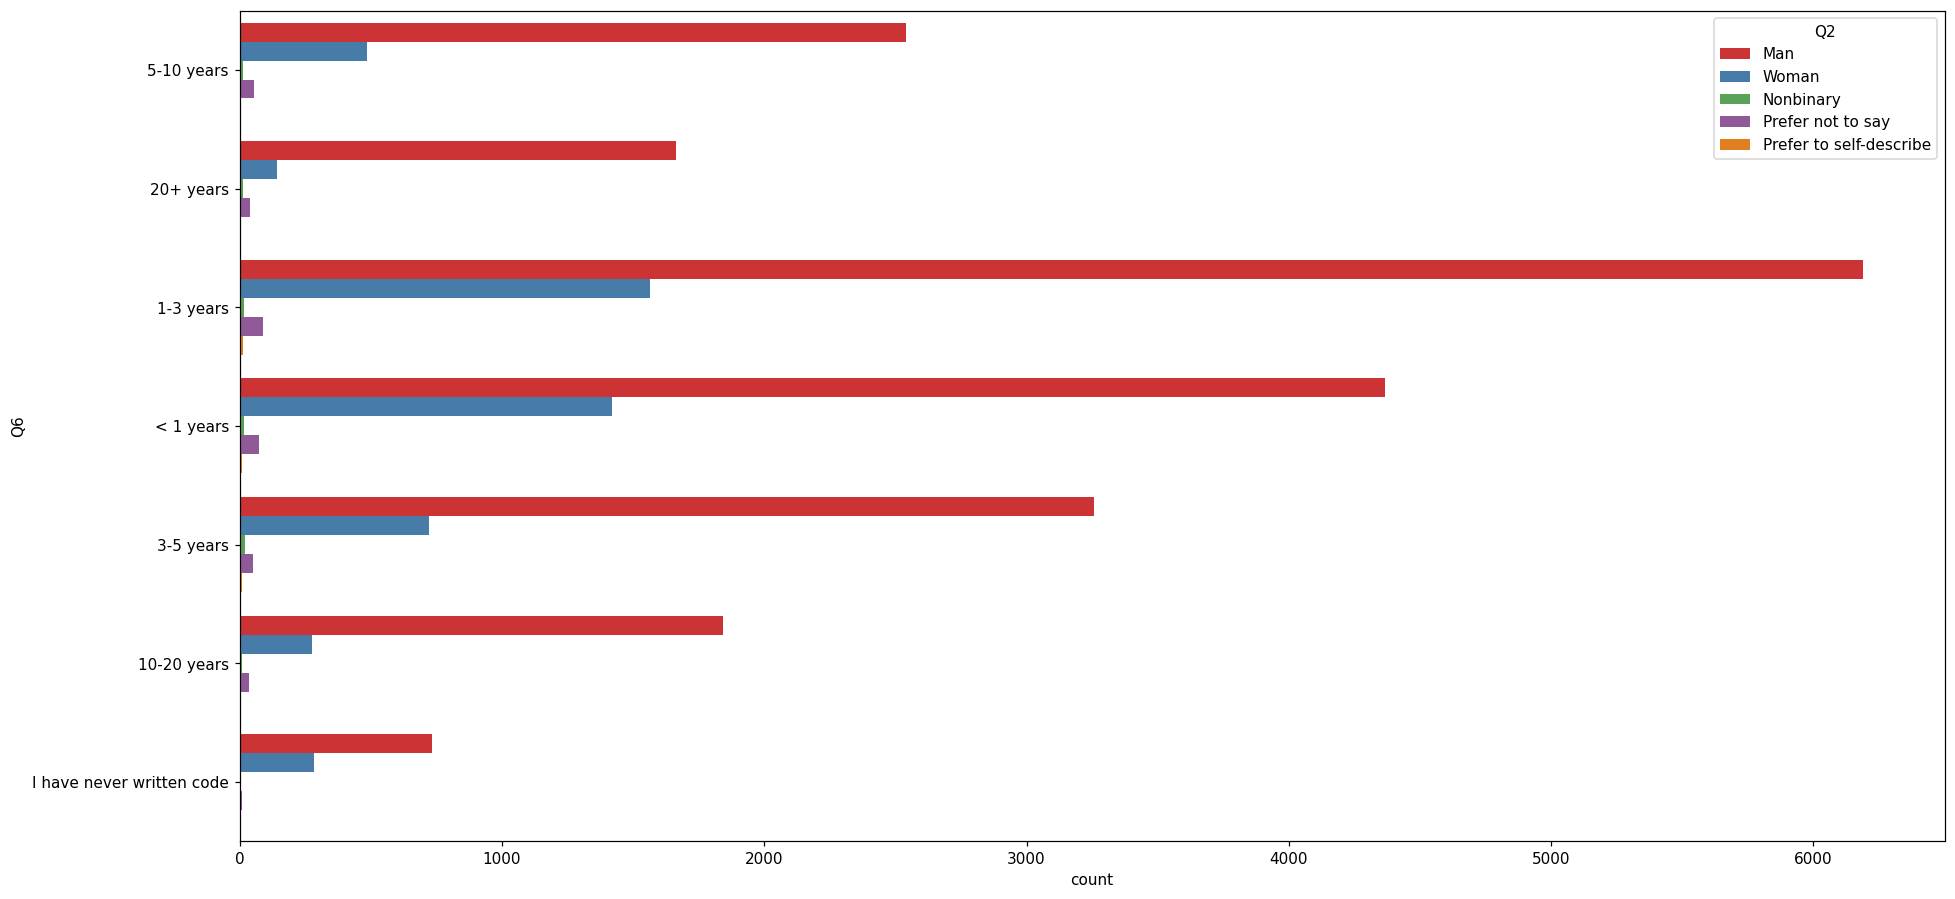

In [24]:
plt.figure(figsize= (20, 10), dpi= 110)
sns.countplot(y= 'Q6', data= data, hue="Q2", palette="Set1")

The participants are most likely to having 1-3 years of writting code experience (30%), dominantly by men and bachelor/master degrees. 

Most interesting that there are 7.16% with experience more than 20 years. These people are the gurus of data science and machine learning. **Much Respect** 

Surprisingly there are 3.97% that have never written any code

## Which language kagglers used on their regular basis ?

before we do any plot or treatements we should have the value_counts of any programming language, as the 7th question is a multi answers question****

In [25]:
Q7_dict= {}
for i in range(1,13):
    Q7_dict.update(dict(data[f"Q7_Part_{i}"].value_counts()))
Q7_df = pd.DataFrame(Q7_dict.items(), columns = ['Planguage', 'counts'])
Q7_df

,Planguage,counts
0,Python,21860
1,R,5334
2,SQL,10756
3,C,4709
4,C++,5535
5,Java,4769
6,Javascript,4332
7,Julia,305
8,Swift,242
9,Bash,2216


In [26]:
plt.figure(figsize= (20, 10))
fig = px.bar(Q7_df, x='Planguage', y='counts')
fig.show()

<Figure size 1440x720 with 0 Axes>

In [27]:
fig = px.pie(Q7_df, values='counts', names='Planguage', title='Programming languages used By Kagglers')
fig.show()

In [28]:
import math

hover_text = []
bubble_size = []
for index, row in Q7_df.iterrows():
    hover_text.append(('Programming language: {Planguage}<br>'+
                      'Counts: {counts}').format(Planguage=row['Planguage'],
                                            counts=row['counts']))
    bubble_size.append(math.sqrt(row['counts']))

Q7_df['text'] = hover_text
Q7_df['size'] = bubble_size
sizeref = 2.*max(Q7_df['size'])/(100**2)

# Dictionary with dataframes for each continent
languages_names = list(Q7_df.iloc[:,0])
languages_data = {Planguage:Q7_df.query("Planguage == '%s'" %Planguage)
                              for Planguage in languages_names}
# Create figure
fig = go.Figure()

for languages_name, language in languages_data.items():
    fig.add_trace(go.Scatter(
        x=language['counts'], y=language['Planguage'],
        name=languages_name, text=language['text'],
        marker_size=language['size'],
        ))

# Tune marker appearance and layout
fig.update_traces(mode='markers', marker=dict(sizemode='area',
                                              sizeref=sizeref, line_width=2))

fig.update_layout(
    title='Most Programming languages used by Kagglers',
    xaxis=dict(
        title='Count of use of the programming language',
        gridcolor='white',
        type='log',
        gridwidth=2,
    ),
    yaxis=dict(
        title='programming language',
        gridcolor='white',
        gridwidth=2,
    ),
    paper_bgcolor='rgb(243, 243, 243)',
    plot_bgcolor='rgb(243, 243, 243)',
)
fig.show()

**Python** is the most programming languages used by Kaggles (participants on the survey) with 34.5% then cames SQL, C++...

## What the most recommended programming language

In [29]:
data['Q8'].value_counts()

Python        20213
R              1445
SQL            1338
C               440
C++             437
Java            242
MATLAB          215
Other           176
Julia           137
Javascript      133
None            111
Bash             38
Swift            15
Name: Q8, dtype: int64

In [30]:
data['Q8'].isnull().sum()

1033

In [31]:
data.Q8.fillna("None", inplace=True)

In [32]:
data['Q8'].isnull().sum()

0

In [33]:
data['Q8'].value_counts()

Python        20213
R              1445
SQL            1338
None           1144
C               440
C++             437
Java            242
MATLAB          215
Other           176
Julia           137
Javascript      133
Bash             38
Swift            15
Name: Q8, dtype: int64

<AxesSubplot:xlabel='Q8', ylabel='count'>

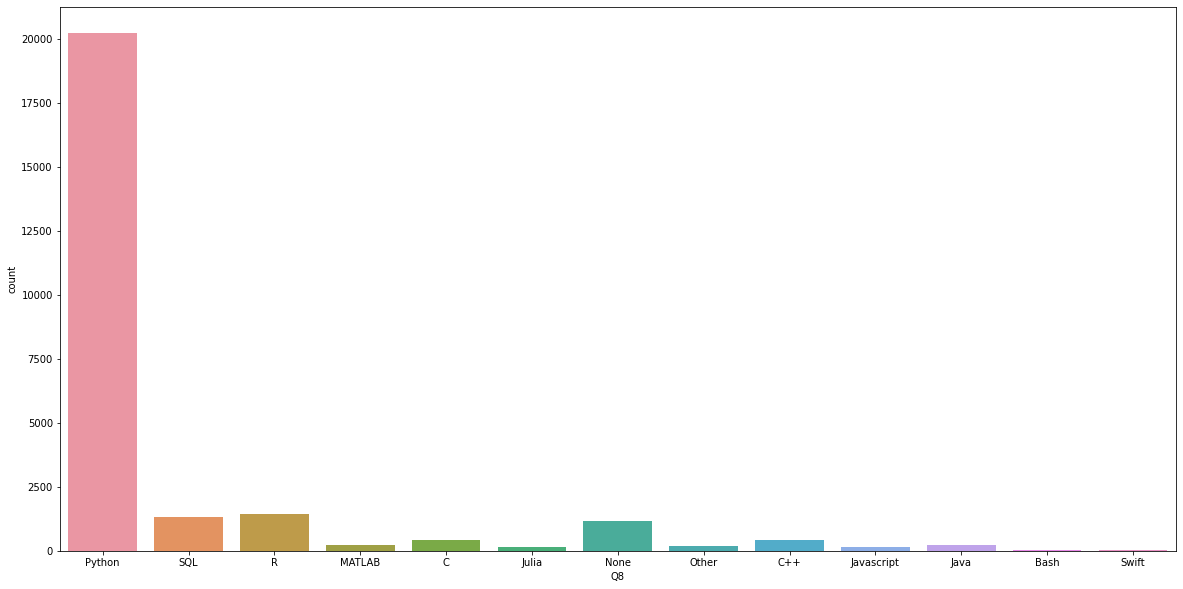

In [34]:
plt.figure(figsize= (20, 10))
sns.countplot(x= 'Q8', data= data)

> But Who Recommend it ?

<AxesSubplot:xlabel='Q8', ylabel='count'>

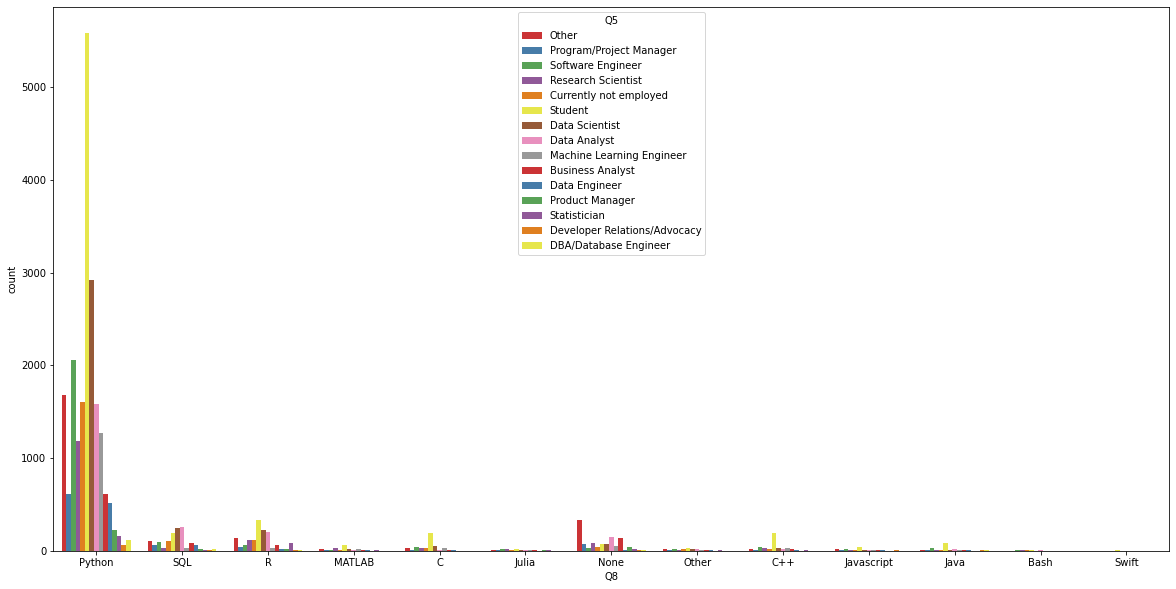

In [35]:
plt.figure(figsize= (20, 10))
sns.countplot(x= 'Q8', data= data, hue="Q5", palette="Set1")

> **Python** is the most recommended language to learn first, and it is recommended by data scientist/Engineers..., Swift is the less recommended language to learn first

## Which integrated development environments (IDE's) is the most used on a regular basis?

In [36]:
Q9_columns = [column for column in df.columns if 'Q9' in column]
Q9_dict = {}

for column in Q9_columns:
    Q9_dict.update(dict(data[column].value_counts()))

Q9_df = pd.DataFrame(Q9_dict.items(), columns = ['IDE', 'counts'])
Q9_df

,IDE,counts
0,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",5488
1,RStudio,4771
2,Visual Studio,4110
3,Visual Studio Code (VSCode),10040
4,PyCharm,7468
5,Spyder,3794
6,Notepad++,3937
7,Sublime Text,2839
8,Vim / Emacs,1646
9,MATLAB,2203


In [37]:
print(Q9_df["counts"][0] , Q9_df["counts"][10])

5488 16233


In [38]:
Q9_df["counts"][0] = Q9_df["counts"][0] + Q9_df["counts"][10]
Q9_df.drop(index=10, axis=1, inplace=True)

In [39]:
Q9_df

,IDE,counts
0,"Jupyter (JupyterLab, Jupyter Notebooks, etc)",21721
1,RStudio,4771
2,Visual Studio,4110
3,Visual Studio Code (VSCode),10040
4,PyCharm,7468
5,Spyder,3794
6,Notepad++,3937
7,Sublime Text,2839
8,Vim / Emacs,1646
9,MATLAB,2203


In [40]:
labels = list(Q9_df["IDE"])
values = list(Q9_df["counts"])
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

> **Jupyter (JupyterLab, Jupyter Notebooks, etc)** are the most IDE used, and that's due to the big number of Data Scientist/Analyst..., Then we find VSCode as it is One of the best IDE in the word & it can be used by event data jobs

## Which hosted notebook products is the most used on a regular basis? 

In [41]:
Q10_columns = [column for column in df.columns if 'Q10' in column]
Q10_dict = {}

for column in Q10_columns:
    Q10_dict.update(dict(data[column].value_counts()))

Q10_df = pd.DataFrame(Q10_dict.items(), columns = ['IDE', 'counts'])
Q10_df

,IDE,counts
0,Kaggle Notebooks,9507
1,Colab Notebooks,9792
2,Azure Notebooks,1062
3,Paperspace / Gradient,209
4,Binder / JupyterHub,1770
5,Code Ocean,175
6,IBM Watson Studio,1067
7,Amazon Sagemaker Studio Notebooks,753
8,Amazon EMR Notebooks,348
9,Google Cloud Notebooks (AI Platform / Vertex AI),2051


In [42]:
fig = px.bar(Q10_df, x='IDE', y='counts',
             hover_data=['IDE'], color='counts',
             labels={'IDE':'hosted notebook'}, height=600)
fig.show()


> As I expected Colab & Kaggle Notebooks are the most hosted notebooks used

## The most computing platform often us for your data science projects

In [43]:
data["Q11"].value_counts()

A laptop                                                               16231
A personal computer / desktop                                           4916
A cloud computing platform (AWS, Azure, GCP, hosted notebooks, etc)     2328
A deep learning workstation (NVIDIA GTX, LambdaLabs, etc)                814
None                                                                     259
Other                                                                    172
Name: Q11, dtype: int64

In [44]:
labels = list(data.Q11.value_counts().index)
values = list(data.Q11.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, pull=[0.2, 0.1, 0.2, 0.2, 0.2], hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

> 65% of the data scientist/analyst... use their laptops for their data projects, and almost 20% use a desktop computer...

<AxesSubplot:xlabel='count', ylabel='Q11'>

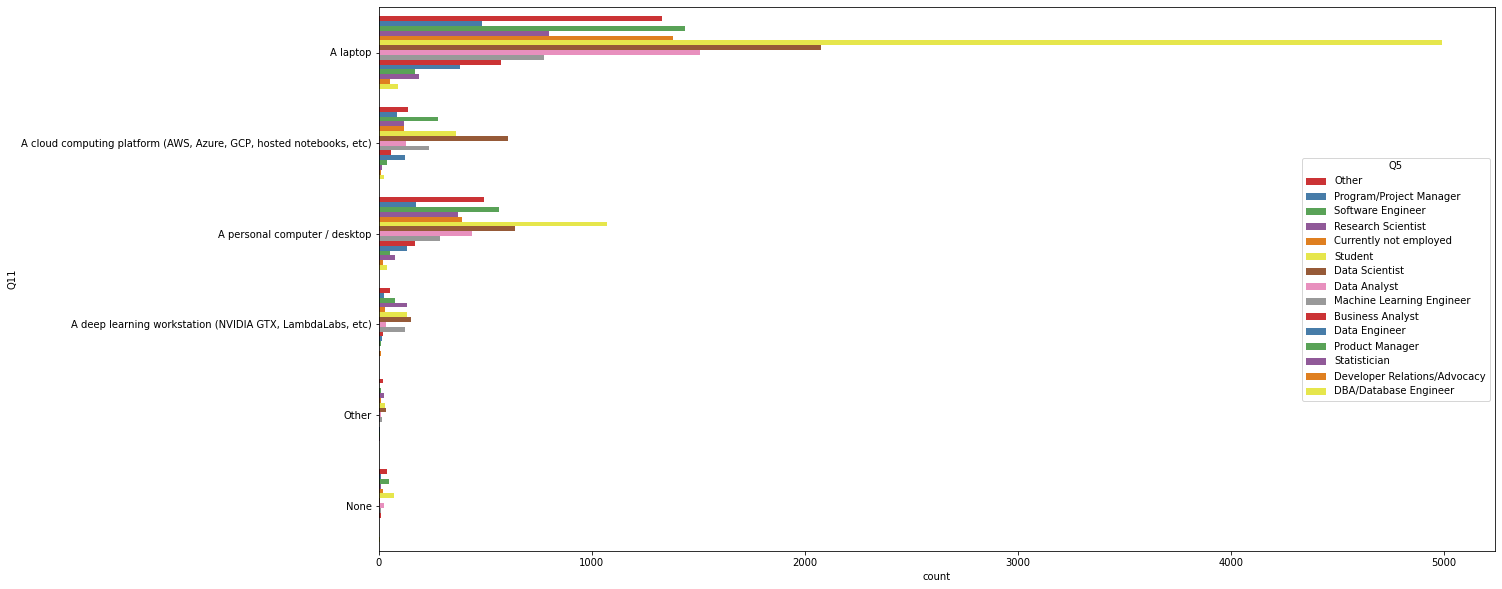

In [45]:
plt.figure(figsize= (20, 10))
sns.countplot(y= 'Q11', data= data, hue="Q5", palette="Set1")

> Turned out That Data Scientist are the most ones using Cloud latforms

## Which types of specialized hardware used on a regular basis?

In [46]:
Q12_columns = [column for column in df.columns if 'Q12' in column]
Q12_dict = {}

for column in Q12_columns:
    Q12_dict.update(dict(data[column].value_counts()))

Q12_df = pd.DataFrame(Q12_dict.items(), columns = ['hardware', 'counts'])
Q12_df

,hardware,counts
0,NVIDIA GPUs,8036
1,Google Cloud TPUs,3451
2,AWS Trainium Chips,414
3,AWS Inferentia Chips,416
4,None,13234
5,Other,867


In [47]:
fig = px.pie(Q12_df, values='counts', names='hardware', title='specialized hardware used on a regular basis?')
fig.show()

> 50.1% of kagglers don't use any specialized hardware, then comes NVIDIA GPUs with 30.4%, AWS are the less used hardwares

## Number of times kaggle users used a TPU (tensor processing unit)

In [48]:
data["Q13"].value_counts()

Never                 16457
2-5 times              3405
Once                   2982
6-25 times              947
More than 25 times      612
Name: Q13, dtype: int64

<AxesSubplot:xlabel='Q13', ylabel='count'>

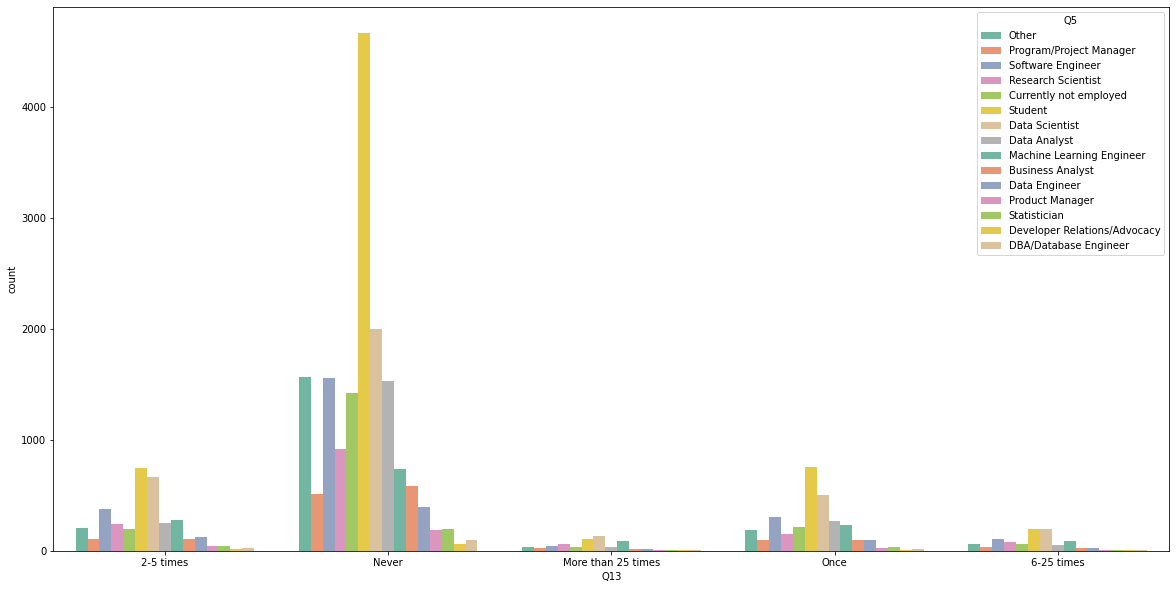

In [49]:
plt.figure(figsize= (20, 10))
sns.countplot(x= 'Q13', data= data, hue="Q5", palette="Set2")

> most uses didn't use TPU before

## Data visualization libraries or tools mostly used on a regular basis?

In [50]:
Q14_columns = [column for column in df.columns if 'Q14' in column]
Q14_dict = {}

for column in Q14_columns:
    Q14_dict.update(dict(data[column].value_counts()))

Q14_df = pd.DataFrame(Q14_dict.items(), columns = ['hardware', 'counts'])
Q14_df

,hardware,counts
0,Matplotlib,17595
1,Seaborn,12586
2,Plotly / Plotly Express,5778
3,Ggplot / ggplot2,5100
4,Shiny,1322
5,D3 js,978
6,Altair,309
7,Bokeh,1050
8,Geoplotlib,1148
9,Leaflet / Folium,716


In [51]:
labels = list(Q14_df["hardware"])
values = list(Q14_df["counts"])
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.3, textinfo='label+percent',
                             insidetextorientation='radial'
                            )])
fig.show()

> Matplotlib, seaborn, Plotly/Plotly Express are the most data visualization libraries or tools mostly used on a regular basis

> PS: This notebook is also writen by these 3 labraries

## Experience of working with machine learning methods

In [52]:
data['Q15'].value_counts()

Under 1 year                             9163
1-2 years                                4675
I do not use machine learning methods    3889
2-3 years                                2305
3-4 years                                1171
5-10 years                               1033
4-5 years                                 945
10-20 years                               362
20 or more years                          211
Name: Q15, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Q15'>

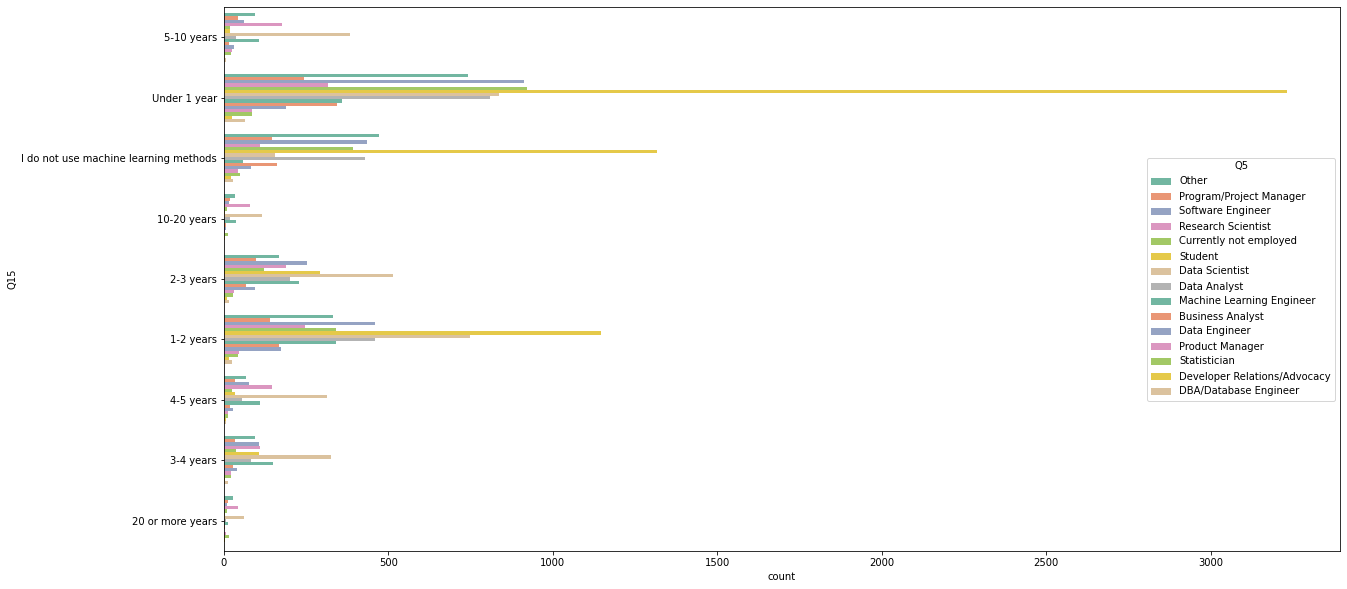

In [53]:
plt.figure(figsize= (20, 10))
sns.countplot(y= 'Q15', data= data, hue="Q5", palette="Set2")

It's almost like the questions of `how many years have the participants been writing code ?`,
> students are almost absent when we are talking about 3 yaers of experience and more, & in contrary they are the much more in less than 3 yers of experience

## Machine learning frameworks used on regular basis

In [54]:
Q16_columns = [column for column in df.columns if 'Q16' in column]
Q16_dict = {}

for column in Q16_columns:
    Q16_dict.update(dict(data[column].value_counts()))

Q16_df = pd.DataFrame(Q16_dict.items(), columns = ['framework', 'counts'])
Q16_df

,framework,counts
0,Scikit-learn,13987
1,TensorFlow,9371
2,Keras,7975
3,PyTorch,6088
4,Fast.ai,824
5,MXNet,252
6,Xgboost,5974
7,LightGBM,2635
8,CatBoost,1512
9,Prophet,800


In [55]:
labels = list(Q16_df["framework"])
values = list(Q16_df["counts"])
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5, textinfo='percent', name="ML frameWorks"
                            )])
fig.show()

> **SkLearn** continues to be the top ML framework used by many Kagglers followed by Tensor-flow and Keras...

## Machine learning algorithms most used by kagglers

In [56]:
Q17_columns = [column for column in df.columns if 'Q17' in column]
Q17_dict = {}

for column in Q17_columns:
    Q17_dict.update(dict(data[column].value_counts()))

Q17_df = pd.DataFrame(Q17_dict.items(), columns = ['algo', 'counts'])
Q17_df

,algo,counts
0,Linear or Logistic Regression,13852
1,Decision Trees or Random Forests,11863
2,"Gradient Boosting Machines (xgboost, lightgbm,...",7566
3,Bayesian Approaches,4392
4,Evolutionary Approaches,963
5,"Dense Neural Networks (MLPs, etc)",4468
6,Convolutional Neural Networks,7410
7,Generative Adversarial Networks,1353
8,Recurrent Neural Networks,4228
9,"Transformer Networks (BERT, gpt-3, etc)",2273


In [57]:
fig = px.bar(Q17_df, x='algo', y='counts',
             hover_data=['algo'], color='counts',
             labels={'algo':'ML algorithms'}, height=600)
fig.show()

> We obviously can see that Linear Models, Tree Models, Bosting Models and CNN are the most used Algorithms on Kaggle, followed by Dense Neural Networks, RNN and Bayesian Approaches,

## Computer vision methods used on a regular basis by kagglers

In [58]:
Q18_columns = [column for column in df.columns if 'Q18' in column]
Q18_dict = {}

for column in Q18_columns:
    Q18_dict.update(dict(data[column].value_counts()))

Q18_df = pd.DataFrame(Q18_dict.items(), columns = ['c_vision', 'counts'])
Q18_df

,c_vision,counts
0,"General purpose image/video tools (PIL, cv2, s...",2662
1,"Image segmentation methods (U-Net, Mask R-CNN,...",2740
2,"Object detection methods (YOLOv3, RetinaNet, etc)",2716
3,Image classification and other general purpose...,4373
4,"Generative Networks (GAN, VAE, etc)",1492
5,None,1439
6,Other,119


In [59]:
fig = px.bar(Q18_df, x='c_vision', y='counts',
             hover_data=['c_vision'], color='counts',
             labels={'c_vision':'Computer vision methods'}, height=900)
fig.show()

> Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc), Image segmentation methods (U-Net, Mask R-CNN, etc) and Object detection methods (YOLOv3, RetinaNet, etc) are the most popular Computer Vision Modules used by Kagglers, But in general CV methods are widely used by kagglers

## NLP (natural language processing) methods used on a regular basis by kagglers

In [60]:
Q19_columns = [column for column in df.columns if 'Q19' in column]
Q19_dict = {}

for column in Q19_columns:
    Q19_dict.update(dict(data[column].value_counts()))

Q19_df = pd.DataFrame(Q19_dict.items(), columns = ['nlp', 'counts'])
Q19_df

,nlp,counts
0,"Word embeddings/vectors (GLoVe, fastText, word...",2643
1,"Encoder-decorder models (seq2seq, vanilla tran...",2023
2,"Contextualized embeddings (ELMo, CoVe)",748
3,"Transformer language models (GPT-3, BERT, XLne...",2351
4,None,1331
5,Other,109


In [61]:
labels = list(Q19_df["nlp"])
values = list(Q19_df["counts"])
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5, textinfo='percent', name="?LP methods"
                            )])
fig.show()

> NLP methods are also used by a certain part of the participants. Not everyone uses those methods. But for those who do - **Word embeddings/vectors (GLoVe, fastText, word2vec)**, Transformer language models (GPT-3, BERT, XLnet, etc) and Encoder-decoder models (seq2seq, vanilla transformers) are the most popular among them.

## Industry of current employement/contract

In [62]:
data["Q20"].value_counts()

Computers/Technology                      4079
Academics/Education                       3214
Accounting/Finance                        1459
Other                                     1136
Manufacturing/Fabrication                  872
Medical/Pharmaceutical                     776
Government/Public Service                  726
Online Service/Internet-based Services     585
Energy/Mining                              558
Retail/Sales                               536
Insurance/Risk Assessment                  424
Marketing/CRM                              373
Broadcasting/Communications                326
Shipping/Transportation                    316
Non-profit/Service                         300
Online Business/Internet-based Sales       275
Military/Security/Defense                  197
Hospitality/Entertainment/Sports           173
Name: Q20, dtype: int64

In [63]:
labels = list(data.Q20.value_counts().index)
values = list(data.Q20.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, textinfo='percent',
                             insidetextorientation='radial'
                            )])
fig.show()

<AxesSubplot:xlabel='count', ylabel='Q20'>

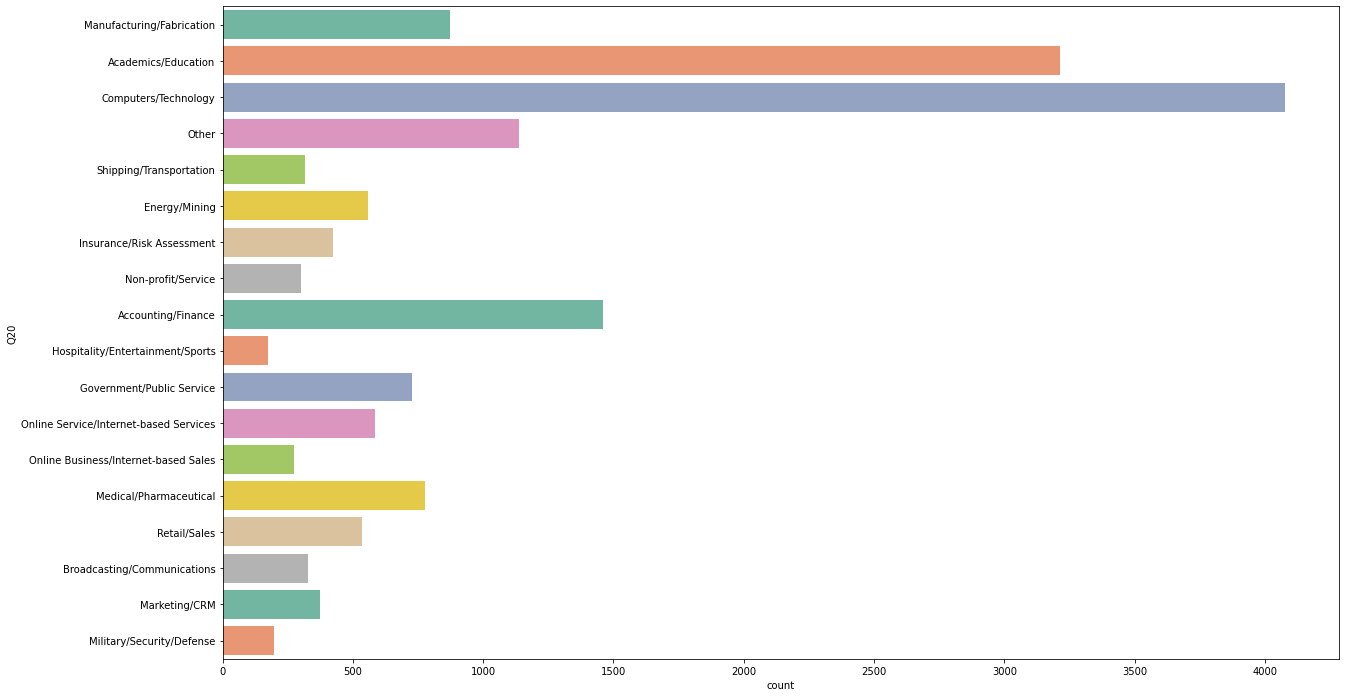

In [64]:
plt.figure(figsize= (20, 12))
sns.countplot(y= 'Q20', data= data, palette="Set2")

> almost 45% of kagglers are working on computers/technology and Academics jobs, following by Accounting/Finance Sectors

## Size of the company of employement

In [65]:
data["Q21"].value_counts()

0-49 employees              5055
10,000 or more employees    3416
1000-9,999 employees        3059
50-249 employees            2567
250-999 employees           2154
Name: Q21, dtype: int64

In [66]:
labels = list(data.Q21.value_counts().index)
values = list(data.Q21.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, textinfo='percent',
                             insidetextorientation='radial'
                            )])
fig.show()

> Different organizations Sizes, but the most frequent is the small/meduim company of 0-49 employees

## Data Science team size in the organizations

In [67]:
data["Q22"].value_counts()

1-2      3642
20+      3595
0        3064
3-4      2558
5-9      1850
10-14     996
15-19     421
Name: Q22, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Q22'>

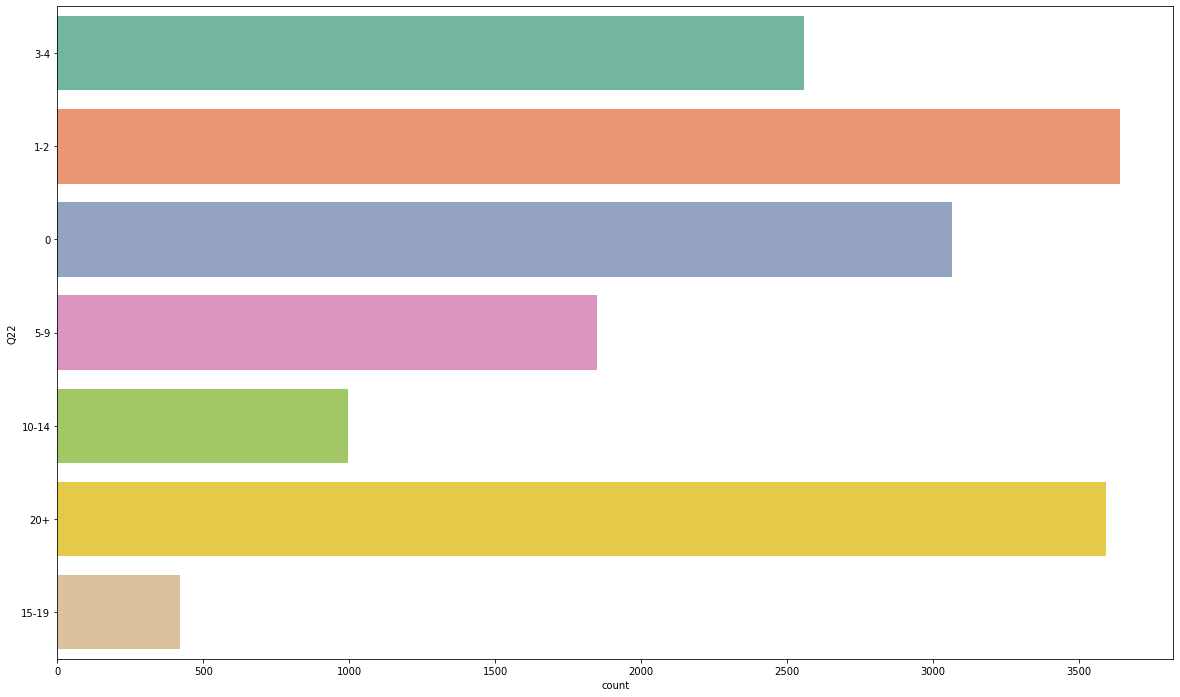

In [68]:
plt.figure(figsize= (20, 12))
sns.countplot(y= 'Q22', data= data, palette="Set2")

In [69]:
labels = list(data.Q22.value_counts().index)
values = list(data.Q22.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, textinfo='percent+label',
                             insidetextorientation='radial'
                            )])
fig.show()

> Approximately 23% of the companies have +20 employees in Data science team & the majority have more that 2 employees.

**But who are the companies that have different DS sizes?**

<AxesSubplot:xlabel='count', ylabel='Q22'>

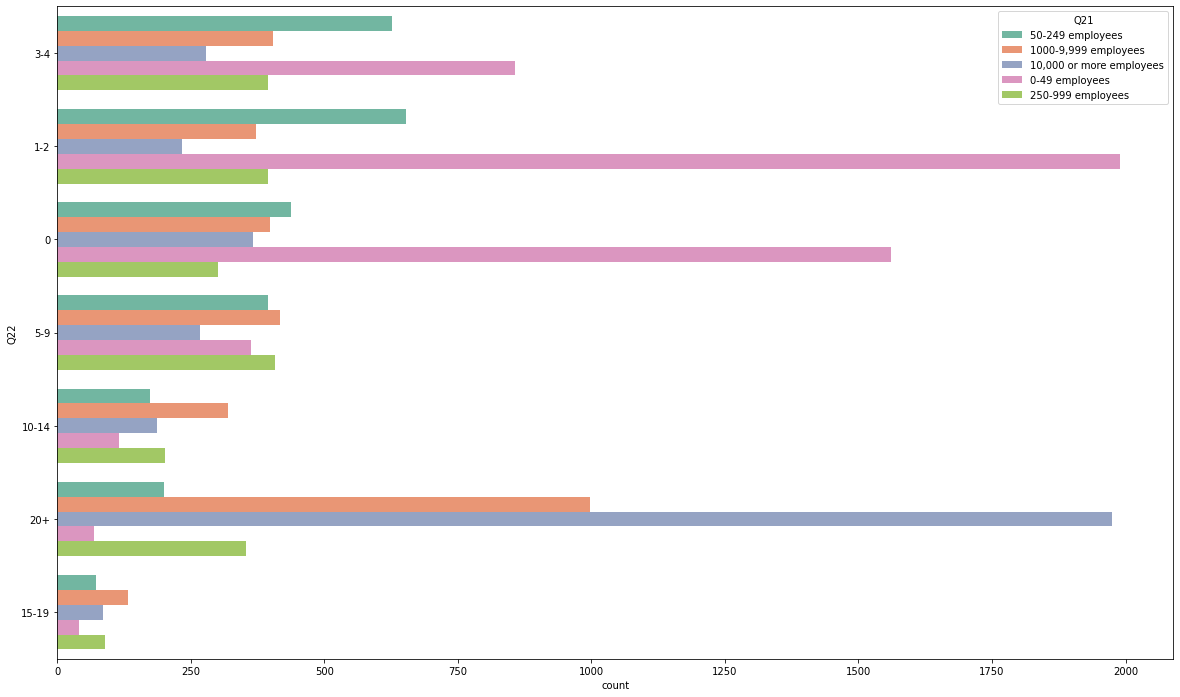

In [70]:
plt.figure(figsize= (20, 12))
sns.countplot(y= 'Q22', data= data,hue="Q21", palette="Set2")

> That's is very well explained, as long as the company is big as long as they have big Data science team. 

> Orgaisations from 0-49 employees have in most cases 0 - 4 employees & organisation more that 49 employees have bigger teams

## Is ML incorporated in Organisations business ?

In [71]:
data["Q23"].value_counts()

We are exploring ML methods (and may one day put a model into production)                    3390
No (we do not use ML methods)                                                                3263
I do not know                                                                                2712
We have well established ML methods (i.e., models in production for more than 2 years)       2633
We recently started using ML methods (i.e., models in production for less than 2 years)      2247
We use ML methods for generating insights (but do not put working models into production)    1707
Name: Q23, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Q23'>

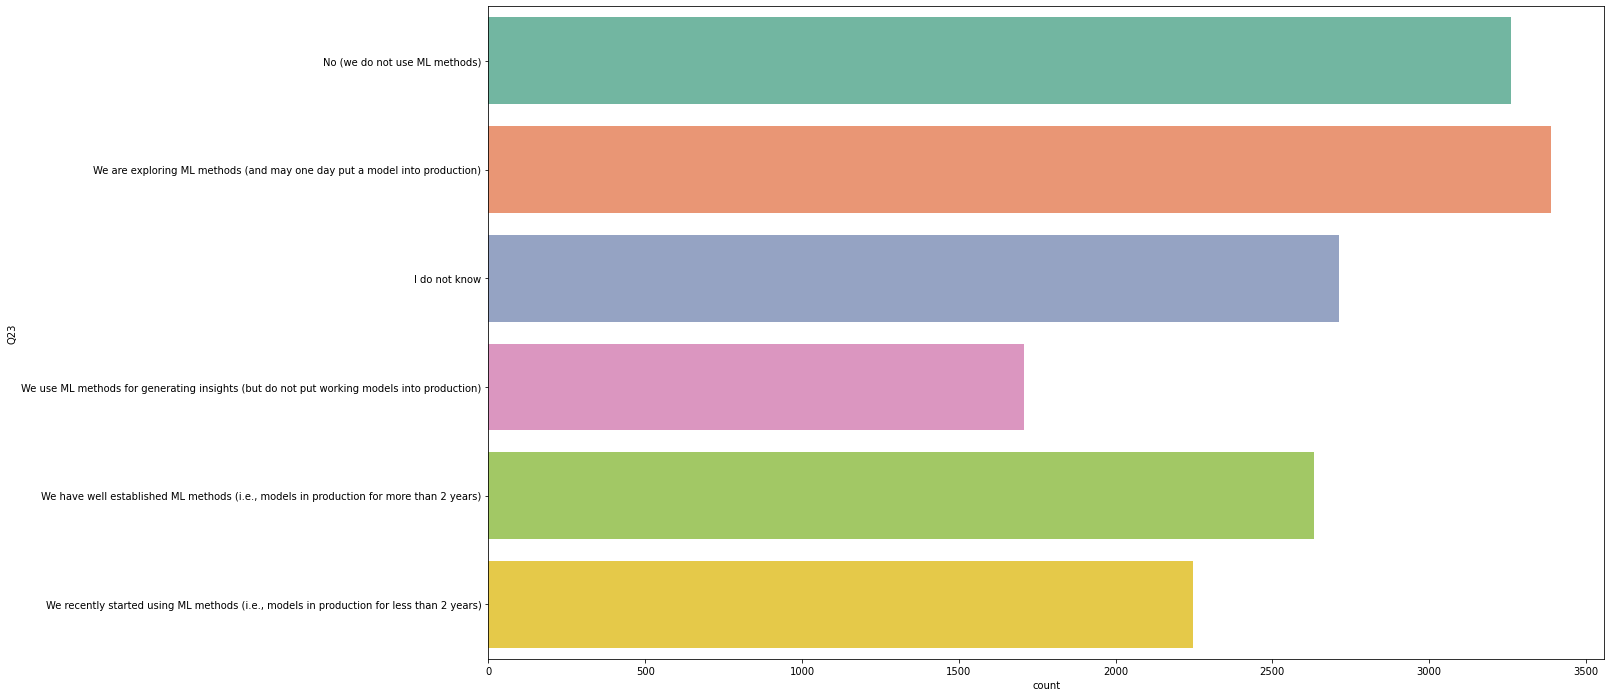

In [72]:
plt.figure(figsize= (20, 12))
sns.countplot(y= 'Q23', data= data, palette="Set2")

<AxesSubplot:xlabel='count', ylabel='Q23'>

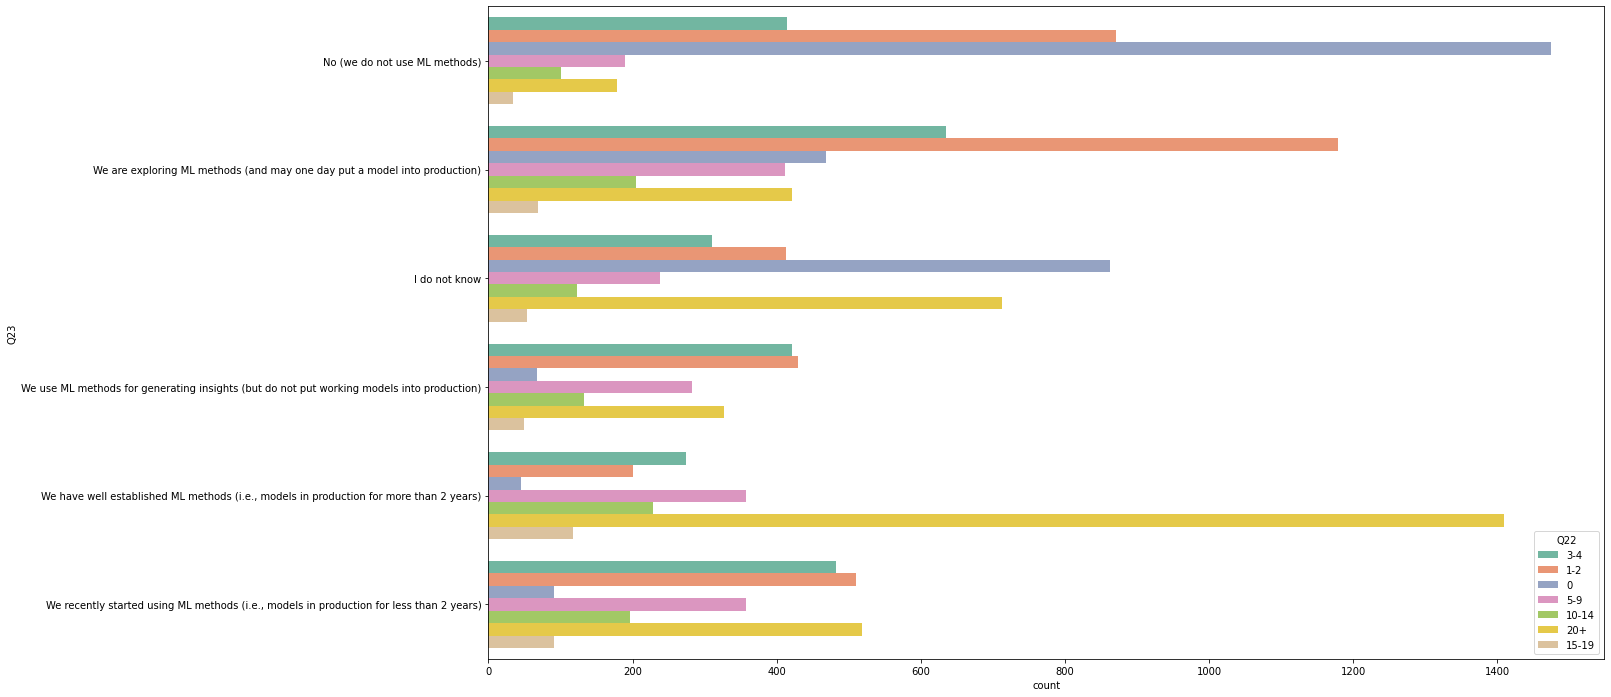

In [73]:
plt.figure(figsize= (20, 12))
sns.countplot(y= 'Q23', data= data,hue="Q22", palette="Set2")

> The past 2 yeras were maybe the revolution of ML methods in organizations as from the last 2 years or maybe before oranization with different DS team sizes are incorporating ML methods in their business...

## Job important activities for kagglers

In [74]:
Q24_columns = [column for column in df.columns if 'Q24' in column]
Q24_dict = {}

for column in Q24_columns:
    Q24_dict.update(dict(data[column].value_counts()))

Q24_df = pd.DataFrame(Q24_dict.items(), columns = ['activity', 'counts'])
Q24_df

,activity,counts
0,Analyze and understand data to influence produ...,9108
1,Build and/or run the data infrastructure that ...,4562
2,Build prototypes to explore applying machine l...,5150
3,Build and/or run a machine learning service th...,3694
4,Experimentation and iteration to improve exist...,3974
5,Do research that advances the state of the art...,3160
6,None of these activities are an important part...,2825
7,Other,677


In [75]:
labels = list(Q24_df["activity"])
values = list(Q24_df["counts"])
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.5, textinfo='percent', name="Job main activities"
                            )])
fig.show()

> Annalyzing and understanding data is main activity for almost 28% of kagglers, followed by exploring prototypes for machine learning by 15.5% ....

## Yearly compensation (approximate $USD)

In [76]:
data["Q25"].value_counts()

$0-999              3369
1,000-1,999          969
10,000-14,999        950
30,000-39,999        741
100,000-124,999      725
5,000-7,499          699
50,000-59,999        697
40,000-49,999        688
20,000-24,999        587
2,000-2,999          575
15,000-19,999        573
7,500-9,999          552
60,000-69,999        551
25,000-29,999        470
70,000-79,999        464
4,000-4,999          456
150,000-199,999      392
80,000-89,999        391
3,000-3,999          380
125,000-149,999      379
90,000-99,999        350
200,000-249,999      177
300,000-499,999       91
250,000-299,999       75
>$1,000,000           58
$500,000-999,999      32
Name: Q25, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Q25'>

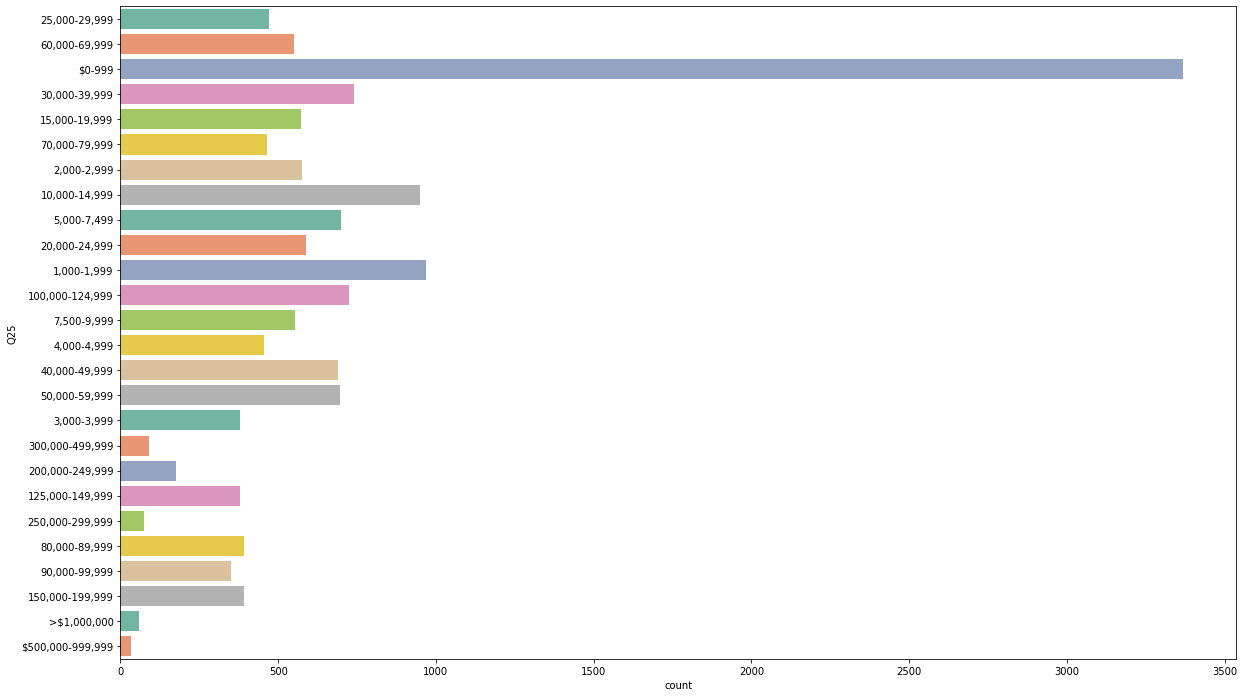

In [77]:
plt.figure(figsize= (20, 12))
sns.countplot(y= 'Q25', data= data, palette="Set2")

<AxesSubplot:xlabel='count', ylabel='Q25'>

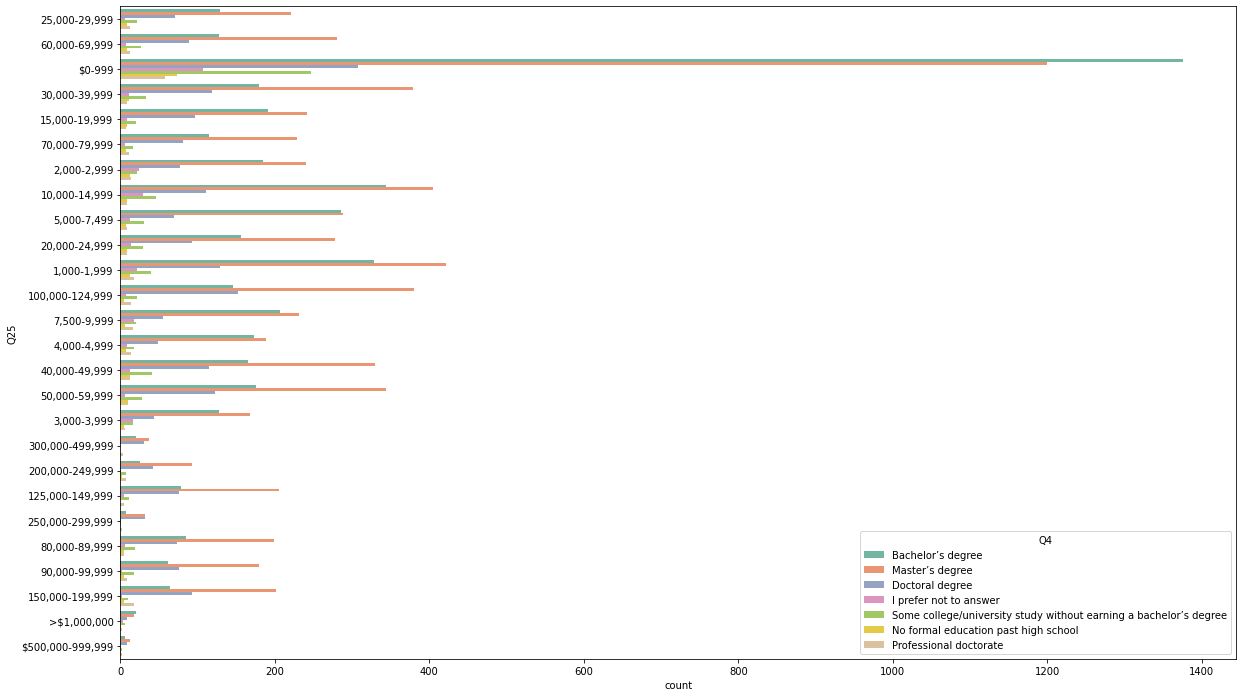

In [78]:
plt.figure(figsize= (20, 12))
sns.countplot(y= 'Q25', data= data,hue="Q4", palette="Set2")

> Bachlor's degree are the most payed 0-999$ , where as Master's degree are the most payed every where !!

## Money spent on machine learning or cloud computing service at home or work place in past 5 years

In [79]:
data["Q26"].value_counts()

$0 ($USD)                  5903
$100-$999                  2534
$1000-$9,999               2491
$1-$99                     1929
$10,000-$99,999            1309
$100,000 or more ($USD)    1017
Name: Q26, dtype: int64

In [80]:
labels = list(data.Q26.value_counts().index)
values = list(data.Q26.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, textinfo='percent+label',
                             insidetextorientation='radial'
                            )])
fig.show()

## Best Cloud computing platform

In [81]:
Q27_a_columns = [column for column in df.columns if 'Q27_A' in column]
Q27_a_dict = {}

for column in Q27_a_columns:
    Q27_a_dict.update(dict(data[column].value_counts()))

Q27_a_df = pd.DataFrame(Q27_a_dict.items(), columns = ['platform', 'counts'])
Q27_a_df

,platform,counts
0,Amazon Web Services (AWS),3721
1,Microsoft Azure,2450
2,Google Cloud Platform (GCP),3142
3,IBM Cloud / Red Hat,572
4,Oracle Cloud,454
5,SAP Cloud,290
6,Salesforce Cloud,275
7,VMware Cloud,390
8,Alibaba Cloud,259
9,Tencent Cloud,172


In [82]:
Q27_b_columns = [column for column in df.columns if 'Q27_B' in column]
Q27_b_dict = {}

for column in Q27_b_columns:
    Q27_b_dict.update(dict(data[column].value_counts()))

Q27_b_df = pd.DataFrame(Q27_b_dict.items(), columns = ['platform', 'counts'])
Q27_b_df

,platform,counts
0,Amazon Web Services (AWS),7494
1,Microsoft Azure,5648
2,Google Cloud Platform (GCP),7484
3,IBM Cloud / Red Hat,2589
4,Oracle Cloud,1712
5,SAP Cloud,910
6,VMware Cloud,784
7,Salesforce Cloud,792
8,Alibaba Cloud,632
9,Tencent Cloud,550


In [83]:
from plotly.subplots import make_subplots


labels_a = list(Q27_a_df["platform"])
values_a = list(Q27_a_df["counts"])

labels_b = list(Q27_b_df["platform"])
values_b = list(Q27_b_df["counts"])

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels_a, values=values_a, name="Used CCP"),
              1, 1)
fig.add_trace(go.Pie(labels=labels_b, values=values_b, name="hope to use CCP"),
              1, 2)

# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text=" Best Cloud computing platform",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='Used CCP', x=0.18, y=0.5, font_size=20, showarrow=False),
                 dict(text='hope to use CCP', x=0.835, y=0.5, font_size=15, showarrow=False)])
fig.show()

> AWS, GCP are the most Cloud computing used world wide by kagglers, and the most ones that people wants to learn in the future

## Most enjoyable Cloud computing platform

In [84]:
data["Q28"].value_counts()

 Amazon Web Services (AWS)                                 836
 Google Cloud Platform (GCP)                               738
They all had a similarly enjoyable developer experience    706
 Microsoft Azure                                           454
None were satisfactory                                      95
 IBM Cloud / Red Hat                                        83
 Oracle Cloud                                               60
 Alibaba Cloud                                              34
Other                                                       31
 VMware Cloud                                               30
 SAP Cloud                                                  23
 Salesforce Cloud                                           23
 Tencent Cloud                                              14
Name: Q28, dtype: int64

In [85]:
labels = list(data.Q28.value_counts().index)
values = list(data.Q28.value_counts())
fig = go.Figure(data=[go.Pie(labels=labels, values=values, hole=.4, textinfo='percent+label',
                             insidetextorientation='radial'
                            )])
fig.show()

<AxesSubplot:xlabel='count', ylabel='Q28'>

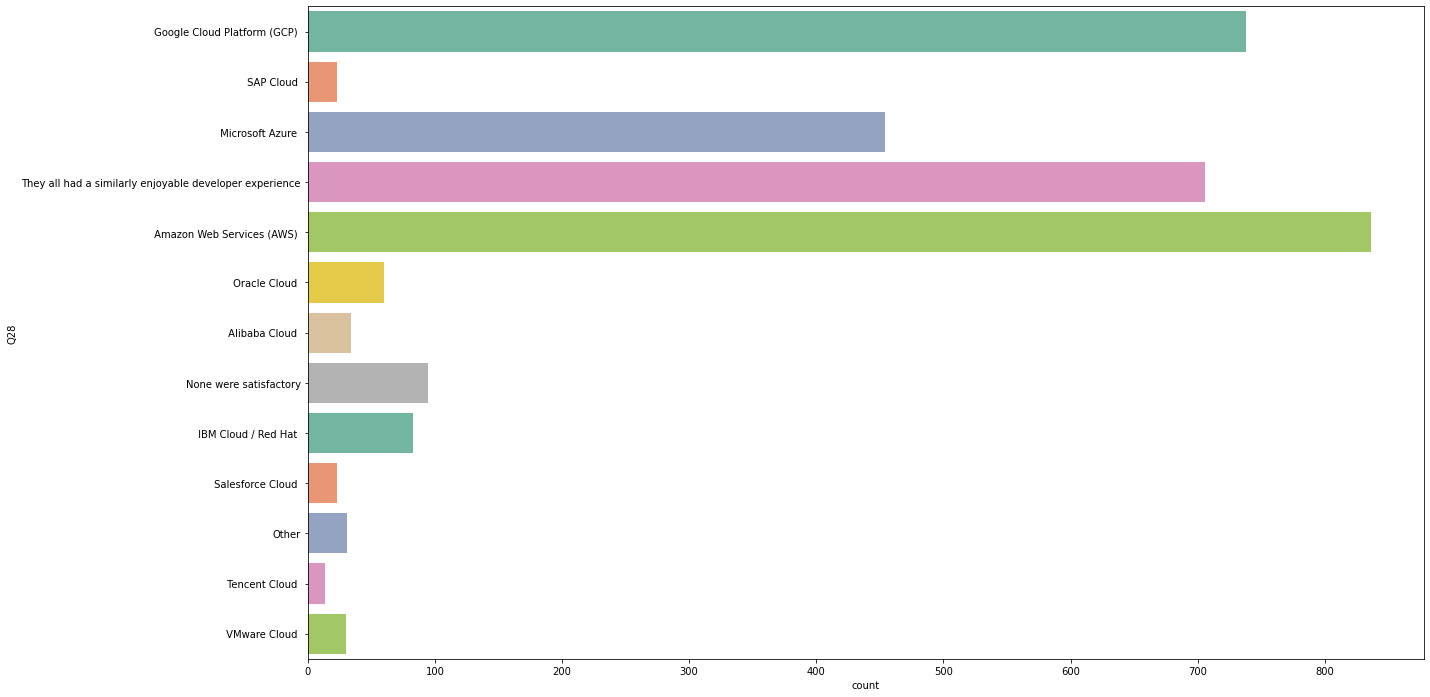

In [86]:
plt.figure(figsize= (20, 12))
sns.countplot(y= 'Q28', data= data, palette="Set2")

> Again AWS, GCP are the most enjoyable Cloud computing platforms